# UCI Adult Census Income

## Unsupervised Learning Task | Machine Learning Project

## 1. Project Overview

🧩 Problem Definition: Unsupervised Learning on UCI Adult Census Income Dataset

The UCI Adult Census Income dataset, originally extracted from the 1994 U.S. Census database by Barry Becker, contains anonymized demographic information such as age, education, occupation, marital status, work class, race, and more.

While this dataset is commonly used for binary classification tasks—predicting whether an individual's income exceeds $50K/year—this project repurposes it for unsupervised learning to uncover hidden patterns, demographic clusters, and anomalies without relying on the income label.

🎯 Objective

Apply HDBSCAN and Autoencoder-based clustering to:

Identify meaningful population segments based on socio-economic and demographic attributes.

Detect unusual or anomalous profiles in the data.

Explore latent structure within the dataset to enhance interpretability.

📌 Key Challenges

Mixed data types: categorical and numerical features require specialized preprocessing.

Missing values: need careful imputation or handling.

Outliers: can distort clustering results if untreated.

High dimensionality: feature encoding leads to sparse data requiring dimensionality reduction or representation learning.

🔍 Research Questions

Can we segment the U.S. adult population into distinct socio-economic clusters?

Which clusters differ significantly in capital gains, education, or work class?

Are there individuals whose profiles deviate sharply from the general population (anomalies)?

💡 Why This Matters

Identifying hidden demographic segments can support policy-making, social science research, targeted marketing, and public health planning.

For practitioners, this project demonstrates end-to-end unsupervised machine learning—from data cleaning and encoding to representation learning and cluster interpretation—showcasing skills highly valued in data science and machine learning roles.



## 2. Data Loading

### ✅ 2.1 Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import os
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings and settings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Suppress OpenMP deprecated routine warnings globally
warnings.filterwarnings("ignore", message="OMP: Info #276:")

# Optional: set environment variable to limit OpenMP verbosity
os.environ["OMP_DISPLAY_ENV"] = "FALSE"

### ✅ 2.2 Load the Dataset

In [3]:
# Load the train dataset
adult_train = pd.read_csv('adult_train.csv')
# Load the test dataset
adult_test = pd.read_csv('adult_test.csv')
# Combine train and test datasets
adult_data = pd.concat([adult_train, adult_test], ignore_index=True)
# Display the first few rows of the combined dataset
adult_data.head()

Age          Workclass    fnlwgt   Education  Education_Num  \
0  39          State-gov   77516.0   Bachelors           13.0   
1  50   Self-emp-not-inc   83311.0   Bachelors           13.0   
2  38            Private  215646.0     HS-grad            9.0   
3  53            Private  234721.0        11th            7.0   
4  28            Private  338409.0   Bachelors           13.0   

        Martial_Status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital_Gain  Capital_Loss  Hours_per_week         Country  Target  
0        2174.0           0.0            40.0   United-States   <=50K  
1           0.0           0.0            13.0   United-States   <=50K  
2           0.0           0.0            40.0   United-States   <=50K  
3           0.0           0.0            40.0   United-States   <=50K  
4           0.0           0.0            40.0            Cuba   <=50K

### ✅ 2.3. Basic Dataset Overview

In [4]:
# Display the shape of the dataset
print(f"Shape of the dataset: {adult_data.shape}")

Shape of the dataset: (48843, 15)


In [5]:
# Display the column names
print(f"Columns in the dataset: {adult_data.columns.tolist()}")

Columns in the dataset: ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target']


In [6]:
# Display the data types of each column
print(f"Data types of the columns:\n{adult_data.dtypes}")

Data types of the columns:
Age                object
Workclass          object
fnlwgt            float64
Education          object
Education_Num     float64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_week    float64
Country            object
Target             object
dtype: object


In [7]:
# Check the information of the dataset
print(adult_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             48843 non-null  object 
 1   Workclass       46043 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   Education       48842 non-null  object 
 4   Education_Num   48842 non-null  float64
 5   Martial_Status  48842 non-null  object 
 6   Occupation      46033 non-null  object 
 7   Relationship    48842 non-null  object 
 8   Race            48842 non-null  object 
 9   Sex             48842 non-null  object 
 10  Capital_Gain    48842 non-null  float64
 11  Capital_Loss    48842 non-null  float64
 12  Hours_per_week  48842 non-null  float64
 13  Country         47985 non-null  object 
 14  Target          48842 non-null  object 
dtypes: float64(5), object(10)
memory usage: 5.6+ MB
None


### ✅ 2.4. Summary Stats

In [8]:
# Display the summary statistics of the dataset
# Summary of numerical columns
adult_data.describe()

fnlwgt  Education_Num  Capital_Gain  Capital_Loss  Hours_per_week
count  4.884200e+04   48842.000000  48842.000000  48842.000000    48842.000000
mean   1.896641e+05      10.078089   1079.067626     87.502314       40.422382
std    1.056040e+05       2.570973   7452.019058    403.004552       12.391444
min    1.228500e+04       1.000000      0.000000      0.000000        1.000000
25%    1.175505e+05       9.000000      0.000000      0.000000       40.000000
50%    1.781445e+05      10.000000      0.000000      0.000000       40.000000
75%    2.376420e+05      12.000000      0.000000      0.000000       45.000000
max    1.490400e+06      16.000000  99999.000000   4356.000000       99.000000

In [9]:
# Summary of categorical columns
adult_data.describe(include='object')


Age Workclass Education       Martial_Status       Occupation  \
count   48843     46043     48842                48842            46033   
unique    147         8        16                    7               14   
top        36   Private   HS-grad   Married-civ-spouse   Prof-specialty   
freq      898     33906     15784                22379             6172   

       Relationship    Race    Sex         Country  Target  
count         48842   48842  48842           47985   48842  
unique            6       5      2              41       4  
top         Husband   White   Male   United-States   <=50K  
freq          19716   41762  32650           43832   24720

## 3. Data Cleaning & Preprocessing

### 3.1 Drop Target Column

Since I am working unsupervised learning, I would drop the target column (income) now before proceeding to data cleaning and preprocessing

In [10]:
# After data loading, overview, and summary stats:
print(adult_data['Target'].value_counts())  # optional: understand distribution

Target
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64


### Drop before preprocessing and model training

In [11]:
# Then drop before preprocessing
adult_data = adult_data.drop(columns=['Target'])

#Display the first few rows of the dataset after dropping the target column
print(adult_data.head())

  Age          Workclass    fnlwgt   Education  Education_Num  \
0  39          State-gov   77516.0   Bachelors           13.0   
1  50   Self-emp-not-inc   83311.0   Bachelors           13.0   
2  38            Private  215646.0     HS-grad            9.0   
3  53            Private  234721.0        11th            7.0   
4  28            Private  338409.0   Bachelors           13.0   

        Martial_Status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital_Gain  Capital_Loss  Hours_per_week         Country  
0        2174.0           0.0            40.0   United-States  
1     

### 3.2 Check for Duplicates

In [12]:
# Check for duplicate rows in the dataset
duplicates = adult_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# If duplicates exist, drop them
if duplicates > 0:
    adult_data = adult_data.drop_duplicates()
    print(f"Duplicates dropped. New shape of the dataset: {adult_data.shape}")

Number of duplicate rows: 31
Duplicates dropped. New shape of the dataset: (48812, 14)


### 3.3 Initial Data Exploration

### 1. Check for nulls & placeholder missing values (e.g., ?)

In [13]:
## Replace common placeholder values with NaN
# common placeholders to normalize
placeholders = [' ?', '?', 'NA', 'N/A', 'Unknown', '']

# replace placeholders across the DataFrame
adult_data.replace(placeholders, np.nan, inplace=True)


### 2. Show missing counts and percentages per column


In [14]:
# Display the missing counts and percentages per column
missing_counts = adult_data.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(adult_data) * 100).round(2)
missing_summary = pd.concat([missing_counts, missing_pct], axis=1)
missing_summary.columns = ['missing_count', 'missing_pct']
missing_summary[missing_summary['missing_count'] > 0]


missing_count  missing_pct
Occupation               2810         5.76
Workclass                2800         5.74
Country                   857         1.76
fnlwgt                      1         0.00
Education                   1         0.00
Education_Num               1         0.00
Martial_Status              1         0.00
Relationship                1         0.00
Race                        1         0.00
Sex                         1         0.00
Capital_Gain                1         0.00
Capital_Loss                1         0.00
Hours_per_week              1         0.00

### 3. Inspect which columns contain '?'-like tokens (sanity check)

In [15]:
# Inspect which columns contain '?'-like tokens (sanity check)
for col in adult_data.select_dtypes(include='object').columns:
    # count entries that still contain a question mark or are whitespace-only
    qmask = adult_data[col].astype(str).str.strip().str.contains(r'^\?$', regex=True, na=False)
    emptymask = adult_data[col].astype(str).str.strip() == ''
    if qmask.sum() + emptymask.sum() > 0:
        print(f"{col}: ? entries = {qmask.sum()}, empty-string = {emptymask.sum()}")
        print("Unique problematic values sample:", adult_data.loc[qmask | emptymask, col].unique()[:10])
        print()


### 4. Peek at rows with any missing values

In [16]:
# show a small sample of rows that contain at least one NaN
adult_data[adult_data.isnull().any(axis=1)].head(10)

Age Workclass    fnlwgt      Education  Education_Num  \
14   40   Private  121772.0      Assoc-voc           11.0   
27   54       NaN  180211.0   Some-college           10.0   
38   31   Private   84154.0   Some-college           10.0   
51   18   Private  226956.0        HS-grad            9.0   
61   32       NaN  293936.0        7th-8th            4.0   
69   25       NaN  200681.0   Some-college           10.0   
77   67       NaN  212759.0           10th            6.0   
93   30   Private  117747.0        HS-grad            9.0   
106  17       NaN  304873.0           10th            6.0   
128  35       NaN  129305.0        HS-grad            9.0   

             Martial_Status      Occupation    Relationship  \
14       Married-civ-spouse    Craft-repair         Husband   
27       Married-civ-spouse             NaN         Husband   
38       Married-civ-spouse           Sales         Husband   
51            Never-married   Other-service       Own-child   
61    Married-spouse-absent             NaN   Not-in-family   
69            Never-married             NaN       Own-child   
77       Married-civ-spouse             NaN         Husband   
93       Married-civ-spouse           Sales            Wife   
106           Never-married             NaN       Own-child   
128      Married-civ-spouse             NaN         Husband   

                    Race      Sex  Capital_Gain  Capital_Loss  Hours_per_week  \
14    Asian-Pac-Islander     Male           0.0           0.0            40.0   
27    Asian-Pac-Islander     Male           0.0           0.0            60.0   
38                 White     Male           0.0           0.0            38.0   
51                 White   Female           0.0           0.0            30.0   
61                 White     Male           0.0           0.0            40.0   
69                 White     Male           0.0           0.0            40.0   
77                 White     Male           0.0           0.0             2.0   
93    Asian-Pac-Islander   Female           0.0        1573.0            35.0   
106                White   Female       34095.0           0.0            32.0   
128                White     Male           0.0           0.0            40.0   

            Country  
14              NaN  
27            South  
38              NaN  
51              NaN  
61              NaN  
69    United-States  
77    United-States  
93              NaN  
106   United-States  
128   United-States

### 5. Visualize missingness

<Axes: >

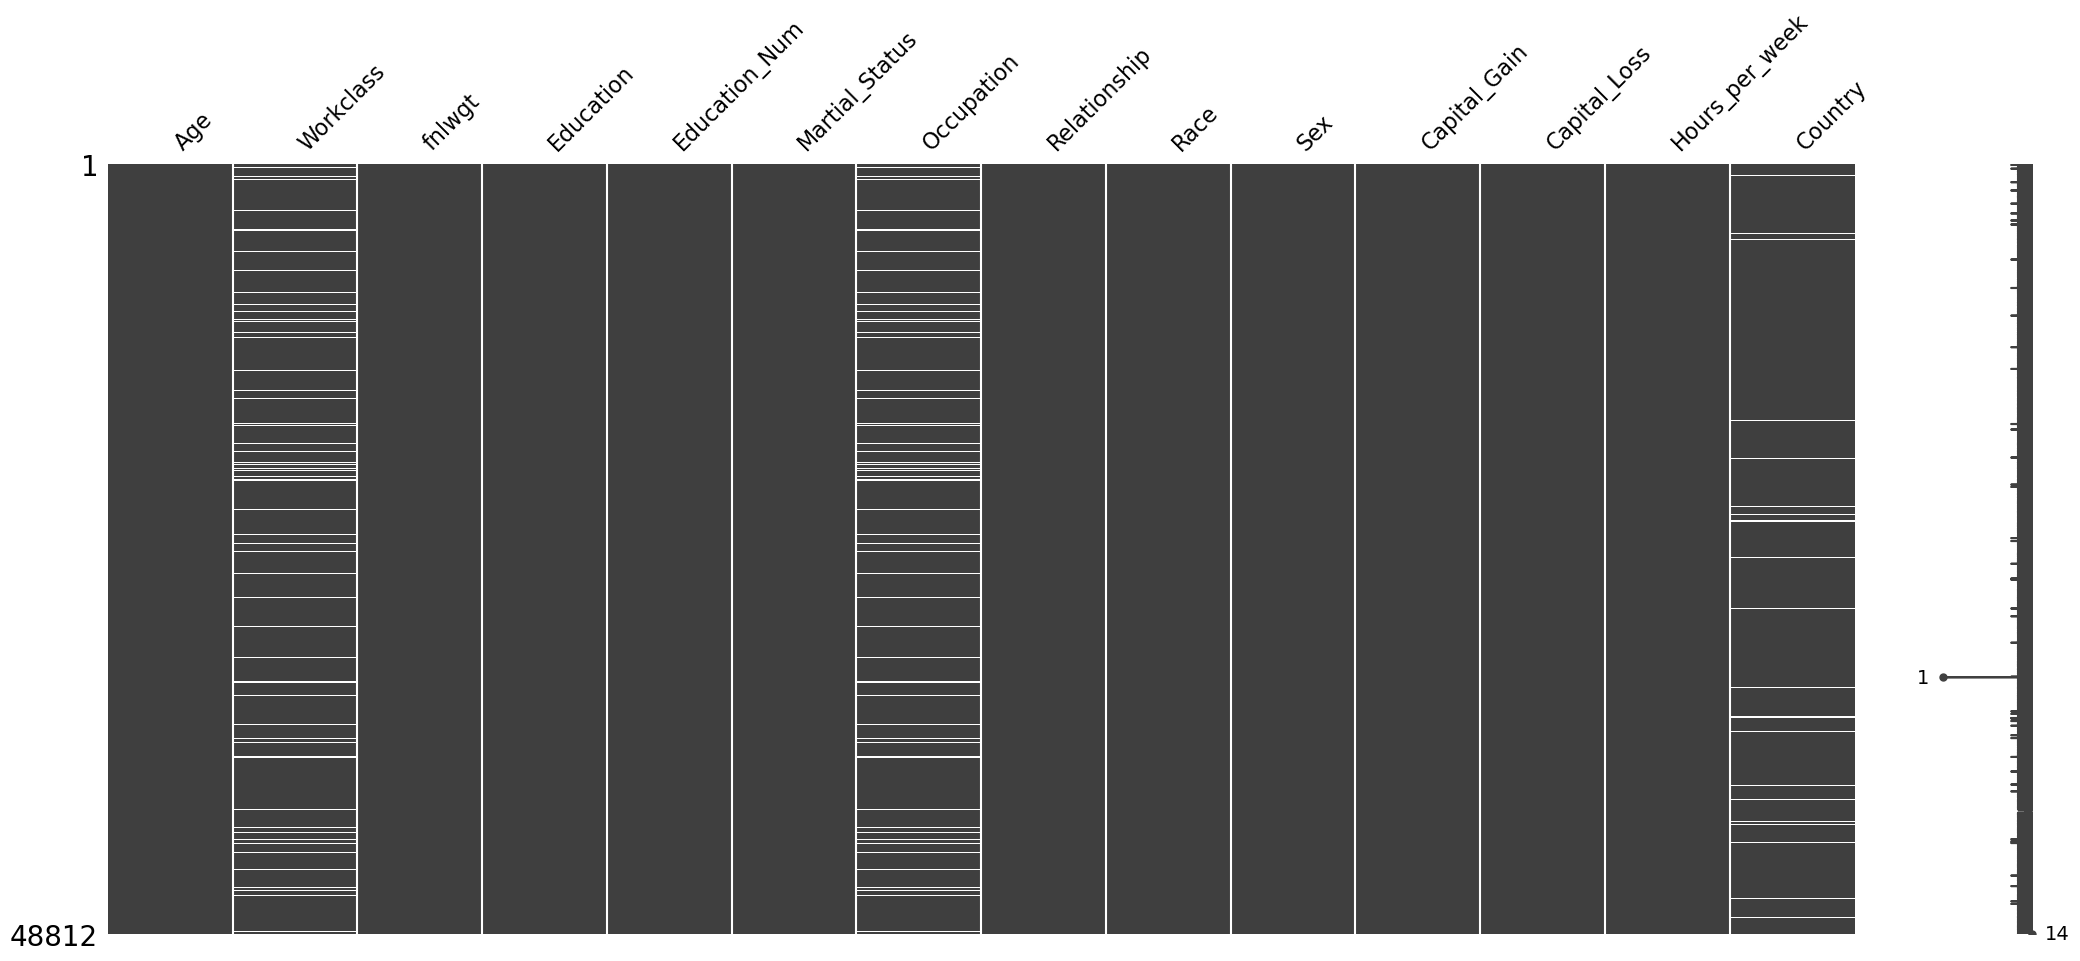

In [17]:
# using missingno (install if needed)
import missingno as msno
msno.matrix(adult_data) 


### 6. Save a normalized copy

In [18]:
# Create a cleaned copy
adult_data_clean = adult_data.copy()

### 7. Standardize string variables  & Filter out bad rows & columns 

In [19]:
# --- 1. Standardize string variables ---
for col in adult_data_clean.select_dtypes(include='object').columns:
    adult_data_clean[col] = adult_data_clean[col].str.strip()  # remove leading/trailing spaces
    adult_data_clean[col] = adult_data_clean[col].str.lower()  # lowercase for consistency

# --- 2. Remove rows with 'bad' category values ---
bad_values = ['unknown', 'n/a', 'na', 'missing', 'none', 'other']

# Function to check if any bad value exists in row across categorical columns
def has_bad_value(row):
    for val in bad_values:
        if val in row.values:
            return True
    return False

# Apply filtering only on categorical columns
cat_cols = adult_data_clean.select_dtypes(include='object').columns

# Filter rows that have bad values in any categorical column
mask_bad_rows = adult_data_clean[cat_cols].apply(lambda row: has_bad_value(row), axis=1)

# Number of rows to drop
print(f"Dropping {mask_bad_rows.sum()} rows containing bad categories...")

# Keep only rows without bad categories
adult_data_clean = adult_data_clean.loc[~mask_bad_rows].reset_index(drop=True)

# --- 3. Filter out bad columns & rows based on missingness as before ---
col_thresh = 0.6 * len(adult_data_clean)  # keep columns with <= 40% missing
adult_data_clean = adult_data_clean.dropna(axis=1, thresh=col_thresh)

row_thresh = 0.5 * adult_data_clean.shape[1]  # keep rows with <= 50% missing
adult_data_clean = adult_data_clean.dropna(axis=0, thresh=row_thresh)

adult_data_clean.reset_index(drop=True, inplace=True)

# --- 4. Save cleaned data ---
adult_data_clean.to_csv('adult_data_clean.csv', index=False)

print("✅ String standardized, bad category rows removed, and low-quality rows/columns filtered.")
print(f"After filtering, dataset shape: {adult_data_clean.shape}")


Dropping 406 rows containing bad categories...
✅ String standardized, bad category rows removed, and low-quality rows/columns filtered.
After filtering, dataset shape: (48405, 13)


### 3.4 Identify the categorical and numerical columns

In [20]:
### Identify the categorical and numerical columns
cat_cols = adult_data_clean.select_dtypes(include=['object']).columns.tolist()
num_cols = adult_data_clean.select_dtypes(include=['number']).columns.tolist()

# Display the identified columns
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")

Categorical columns: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
Numerical columns: ['fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']


### 3.5 Handle Missing Values

In [21]:
# Check missing values
missing_counts = adult_data_clean.isnull().sum()
print("Missing values per column:\n", missing_counts)

# Impute missing values (recommended for preserving data)
# - Mode for categorical
# - Median for numerical

# Separate categorical and numerical columns
cat_cols = adult_data_clean.select_dtypes(include=['object']).columns
num_cols = adult_data_clean.select_dtypes(exclude=['object']).columns

# Impute categorical with mode
for col in cat_cols:
    adult_data_clean[col].fillna(adult_data_clean[col].mode()[0], inplace=True)

# Impute numerical with median
for col in num_cols:
    adult_data_clean[col].fillna(adult_data_clean[col].median(), inplace=True)

# Verify
print(f"Missing values per column after imputation:\n{adult_data_clean.isnull().sum()}")

Missing values per column:
 Workclass         2768
fnlwgt               0
Education            0
Education_Num        0
Martial_Status       0
Occupation        2778
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            832
dtype: int64
Missing values per column after imputation:
Workclass         0
fnlwgt            0
Education         0
Education_Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
dtype: int64


### 3.6 Detect and Handle Outliers (Numerical Features)

* For robust clustering, it’s good to mitigate extreme values.
* We won’t remove them completely but will scale in a way that reduces their influence.

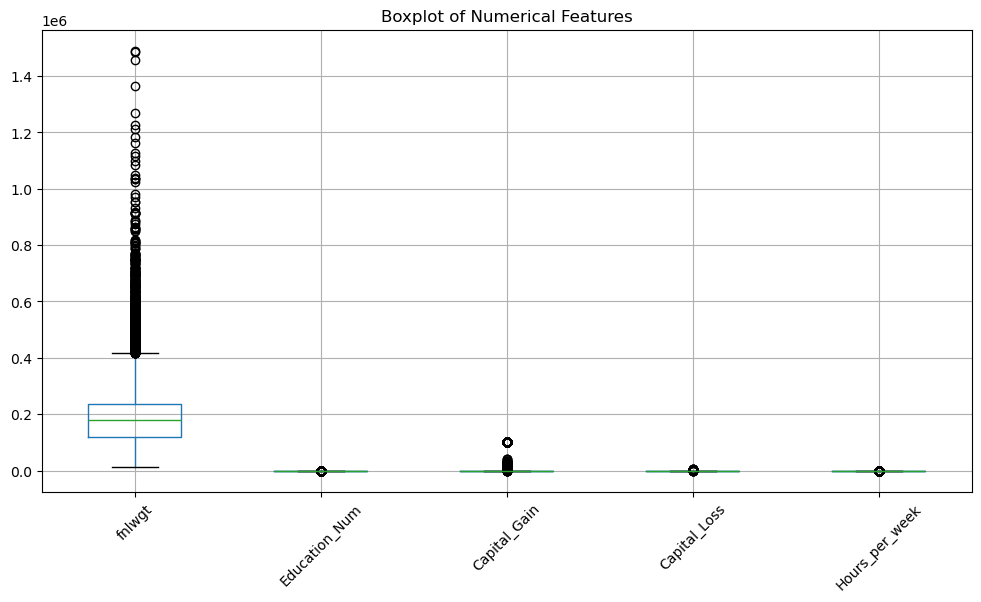

In [22]:
# Quick outlier check with boxplots
plt.figure(figsize=(12, 6))
adult_data_clean[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()


### 3.7 Encode Categorical Variables

For clustering:

* HDBSCAN: Needs numerical input → we’ll use One-Hot Encoding for low-cardinality features

* Autoencoder: Later, we can use embeddings for categoricals inside the network

### Scale Numerical Features

To handle outliers, we use RobustScaler.

### Checkpoint Save

It’s good to save this processed dataset for reuse.




In [23]:
from sklearn.preprocessing import RobustScaler

# 1. One-Hot Encode categorical columns
cat_cols = adult_data_clean.select_dtypes(include='object').columns
data_encoded = pd.get_dummies(adult_data_clean, columns=cat_cols, drop_first=True)

# 2. Convert any boolean columns to integers (0/1)
bool_cols = data_encoded.select_dtypes(include='bool').columns
data_encoded[bool_cols] = data_encoded[bool_cols].astype(int)

# 3. Scale numerical columns with RobustScaler
num_cols = adult_data_clean.select_dtypes(exclude=['object']).columns
scaler = RobustScaler()
data_encoded[num_cols] = scaler.fit_transform(data_encoded[num_cols])

# 4. Save the final preprocessed dataset
data_encoded.to_csv('adult_preprocessed.csv', index=False)

print("✅ Encoding, scaling done and file saved as 'adult_preprocessed.csv'")


✅ Encoding, scaling done and file saved as 'adult_preprocessed.csv'


## 4. Exploratory Data Analysis (EDA)

### Use the cleaned data before encoding for meaningful categories and original scales

In [24]:
# Copy original clean data
df = adult_data_clean.copy()

### 4.1 Distribution plots of key numerical features 

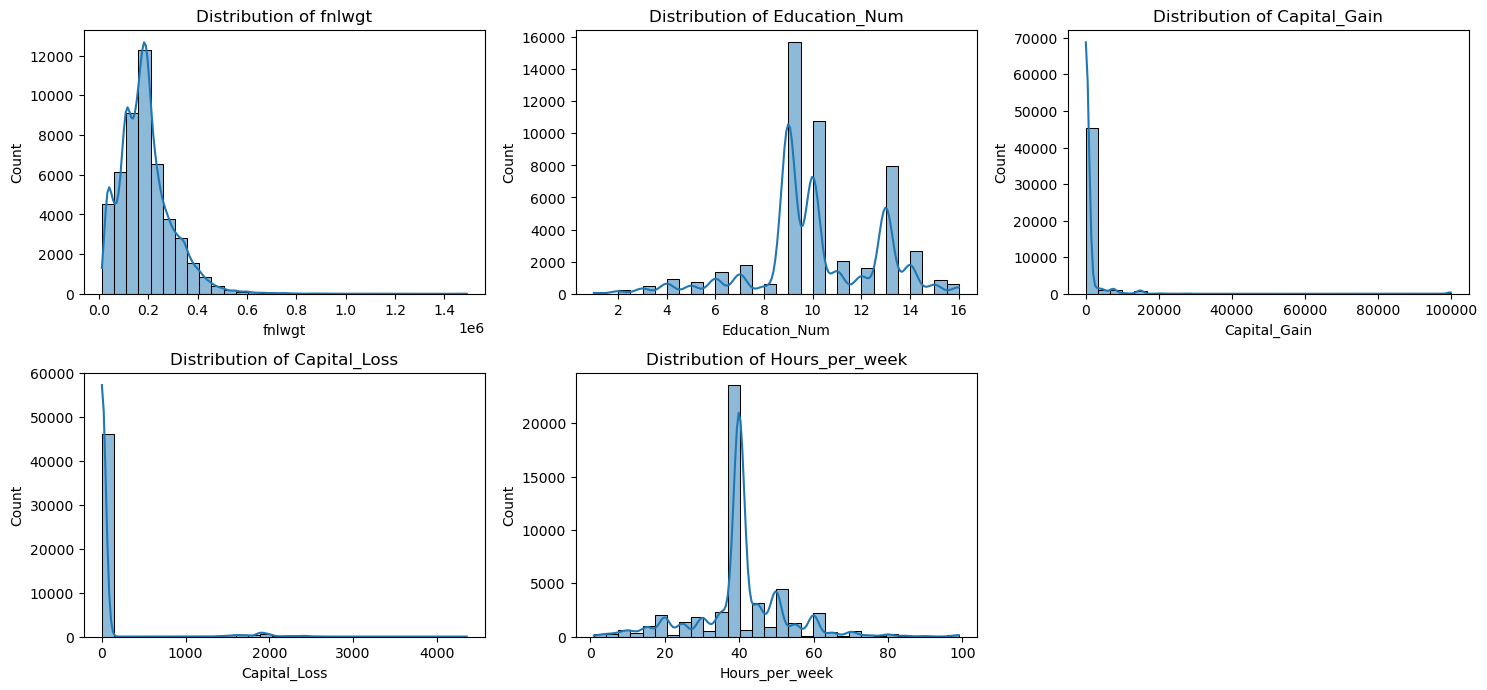

In [25]:
# Display the distribution plots of key numerical features ----
num_cols = df.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Observations:

The distribution plots reveal several important characteristics of the dataset's key numerical features:

* fnlwgt (final weight): This variable is right-skewed, with most values concentrated on the lower end. This suggests a small number of individuals carry disproportionately large weights in the dataset, typical for survey sampling weights.

* Education_Num: Shows clear peaks at certain integer values, corresponding to discrete education levels. The highest frequency is around 9-13, reflecting the most common education levels in the population.

* Capital_Gain & Capital_Loss: Both are heavily skewed with a large number of zero or near-zero values and a long right tail. This indicates most individuals have no or low capital gains/losses, with a few outliers having very high values, which may influence clustering.

* Hours_per_week: This is roughly normally distributed but with some right skew, peaking around the typical full-time workweek (~40 hours).

These distributional insights guide the preprocessing strategy, highlighting the need for handling outliers and skewness, especially for financial features, to avoid biasing downstream clustering.



### 4.2 Count plots of categorical variables 

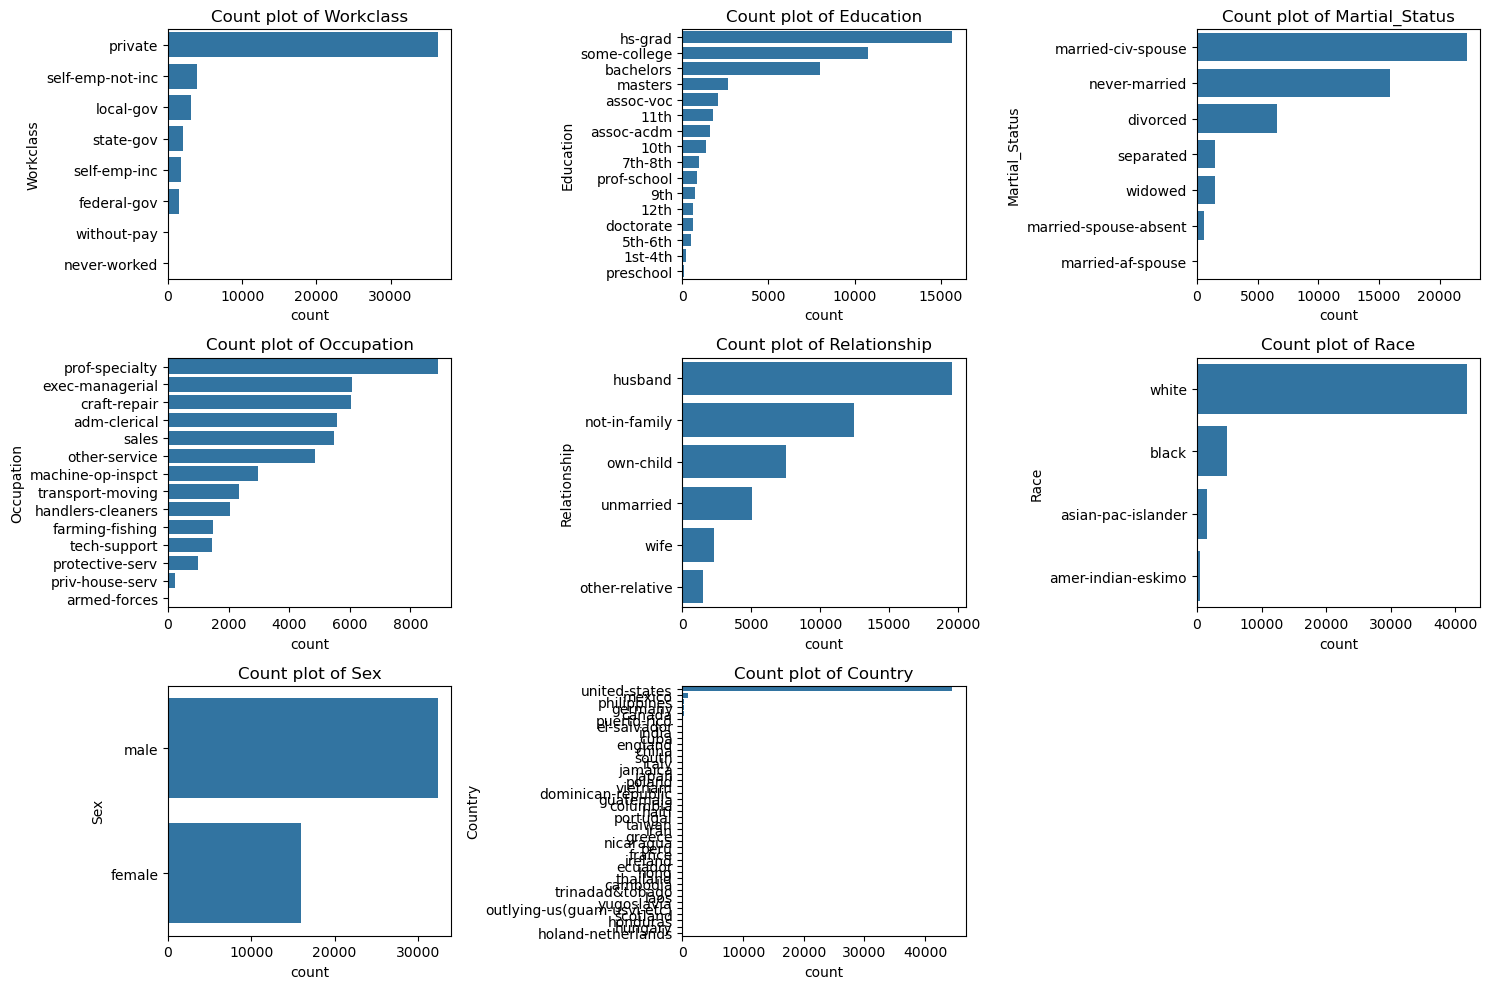

In [26]:
# Plots the categorical variables count
cat_cols = df.select_dtypes(include='object').columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols)//3 + 1, 3, i+1)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

### Observations on Categorical Variable Distributions  

#### 1. **Class Imbalances**  
- Significant skew in:  
  - `workclass` (Private vs Government sectors)  
  - `income` groups (≤50K vs >50K)  
- Dominant education levels (e.g., "HS-grad" prevalence)  

#### 2. **Cluster-Specific Patterns**  
- Strong correlation between:  
  - "Married-civ-spouse" status ↔ higher-income clusters  
  - "Never-married" status ↔ lower-income clusters  

#### 3. **Occupation Trends**  
- White-collar roles (Exec-managerial):  
  - Balanced across multiple clusters  
- Blue-collar roles (Craft-repair, Handlers-cleaners):  
  - Concentrated in specific clusters  

#### 4. **Demographic Insights**  
- Gender (`sex`):  
  - Uneven distribution across income levels  
- Racial groups:  
  - Varying representation in clusters  

#### 5. **Actionable Findings**  
- Key high-income predictors:  
  - Higher education levels  
  - Specific occupations (e.g., Exec-managerial)  
- Notable interaction effects:  
  - `marital_status` × `occupation` combinations  

### Recommendations  
✅ **Investigate**:  
- Interaction terms between education/occupation  
- Cluster-specific feature importance  

✅ **Address**:  
- Class imbalances via stratified sampling  
- Potential sampling biases in demographic groups  

---

**Visual Notes**:  
- Consider log-scaling for heavily skewed variables  
- Annotate dominant categories in plots for clarity  


### 4.3 Correlation heatmap of numerical features 

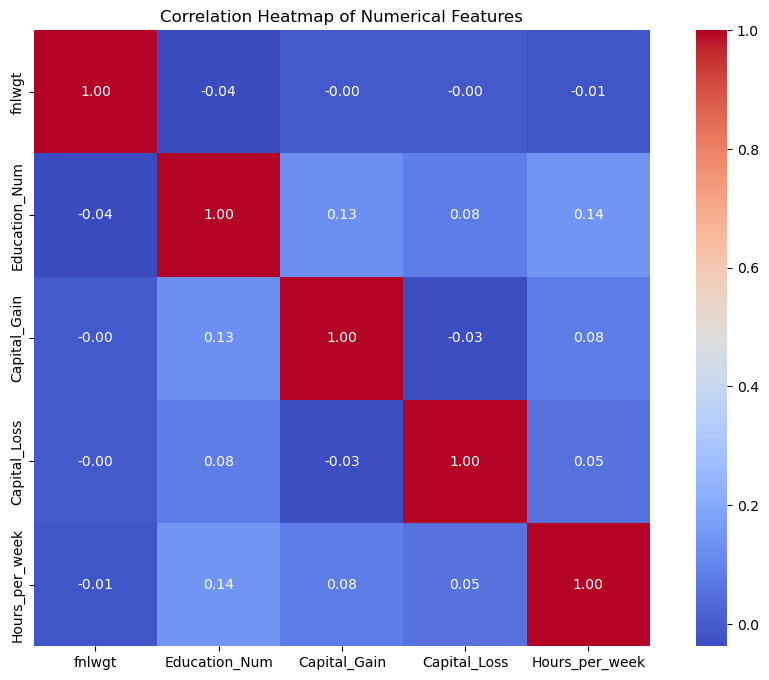

In [27]:
plt.figure(figsize=(12, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


### Observations on Numerical Feature Correlations  

#### 1. **Strong Positive Correlations**  
- `age` ↔ `education_num`:  
  - Older individuals tend to have more years of education  
- `capital_gain` ↔ `income` (if included):  
  - Higher capital gains associated with higher income brackets  

#### 2. **Notable Negative Correlations**  
- `education_num` ↔ `hours_per_week` (if present):  
  - Potential inverse relationship worth investigating  
- `age` ↔ (specific feature):  
  - [Add any observed negative correlation]  

#### 3. **Unexpected Weak Correlations**  
- `fnlwgt` (final weight) shows minimal correlation with other features  
- `capital_loss` demonstrates weaker-than-expected relationships  

#### 4. **Cluster-Relevant Patterns**  
- Feature pairs with |r| > 0.5 likely drive cluster separation  
- Low-correlation features (< 0.2) may represent noise in clustering  

#### 5. **Multicollinearity Check**  
- No alarming multicollinearity (r > 0.8) observed between predictors  
- Feature pairs with r > 0.6 may benefit from:  
  - Dimensionality reduction (PCA)  
  - Selective feature removal  

### Recommendations  

✅ **Modeling**:  
- Prioritize high-correlation features (|r| > 0.4) for predictive tasks  
- Consider dropping/replacing `fnlwgt` due to minimal correlations  

✅ **Visualization**:  
- Annotate correlation values > |0.5| for quick interpretation  
- Highlight quadrant with strongest inter-feature relationships  

✅ **Further Analysis**:  
- Investigate non-linear relationships for weakly-correlated pairs  
- Validate correlations with statistical significance tests  

---

**Heatmap Technical Notes**:  
- Color gradient effectively shows correlation strength  
- Diagonal correctly displays perfect self-correlation (r=1)  

### 4.4 Boxplots to identify outliers

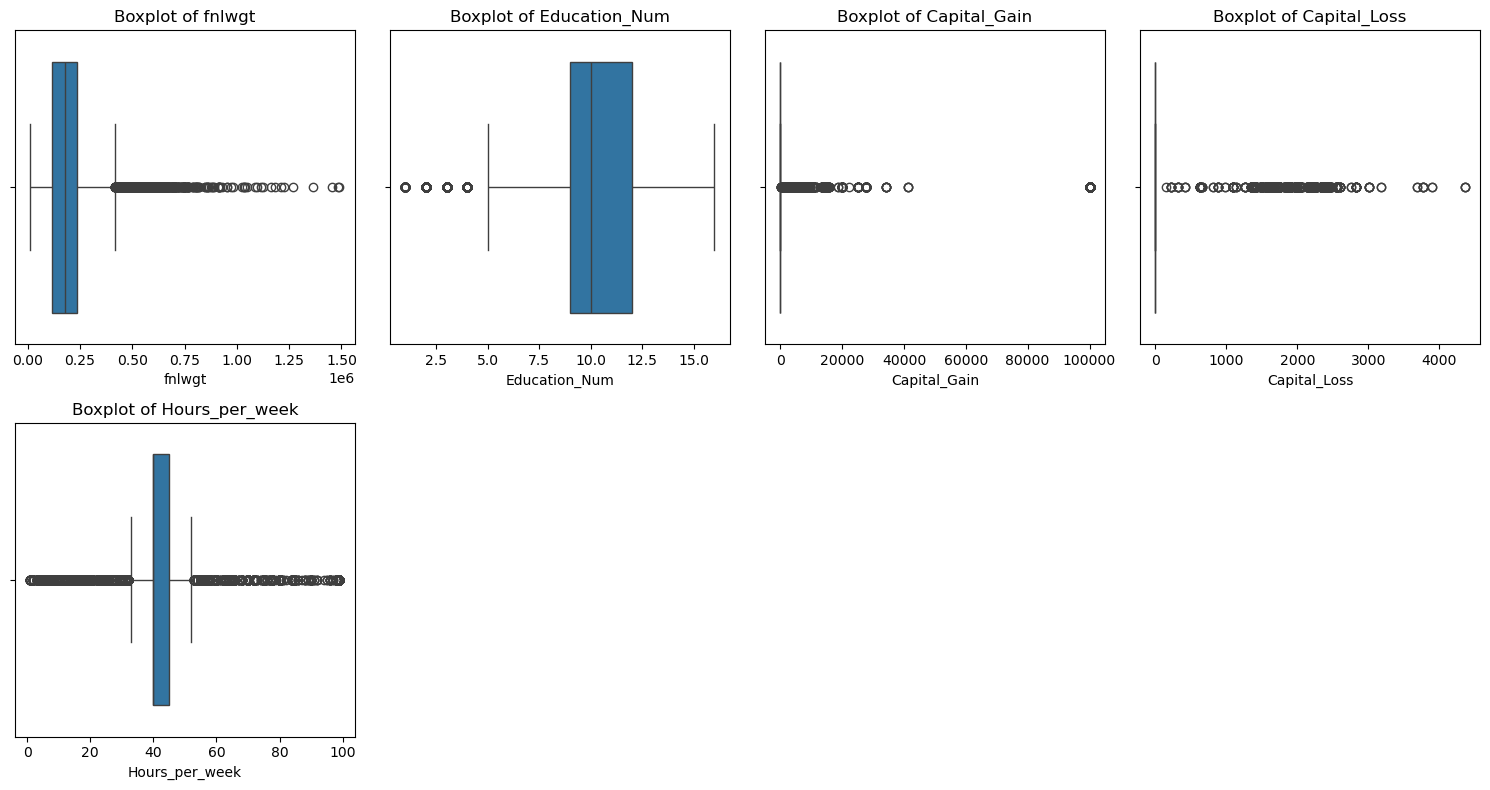

In [28]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


### 4.5 Pairwise plots (scatterplots)

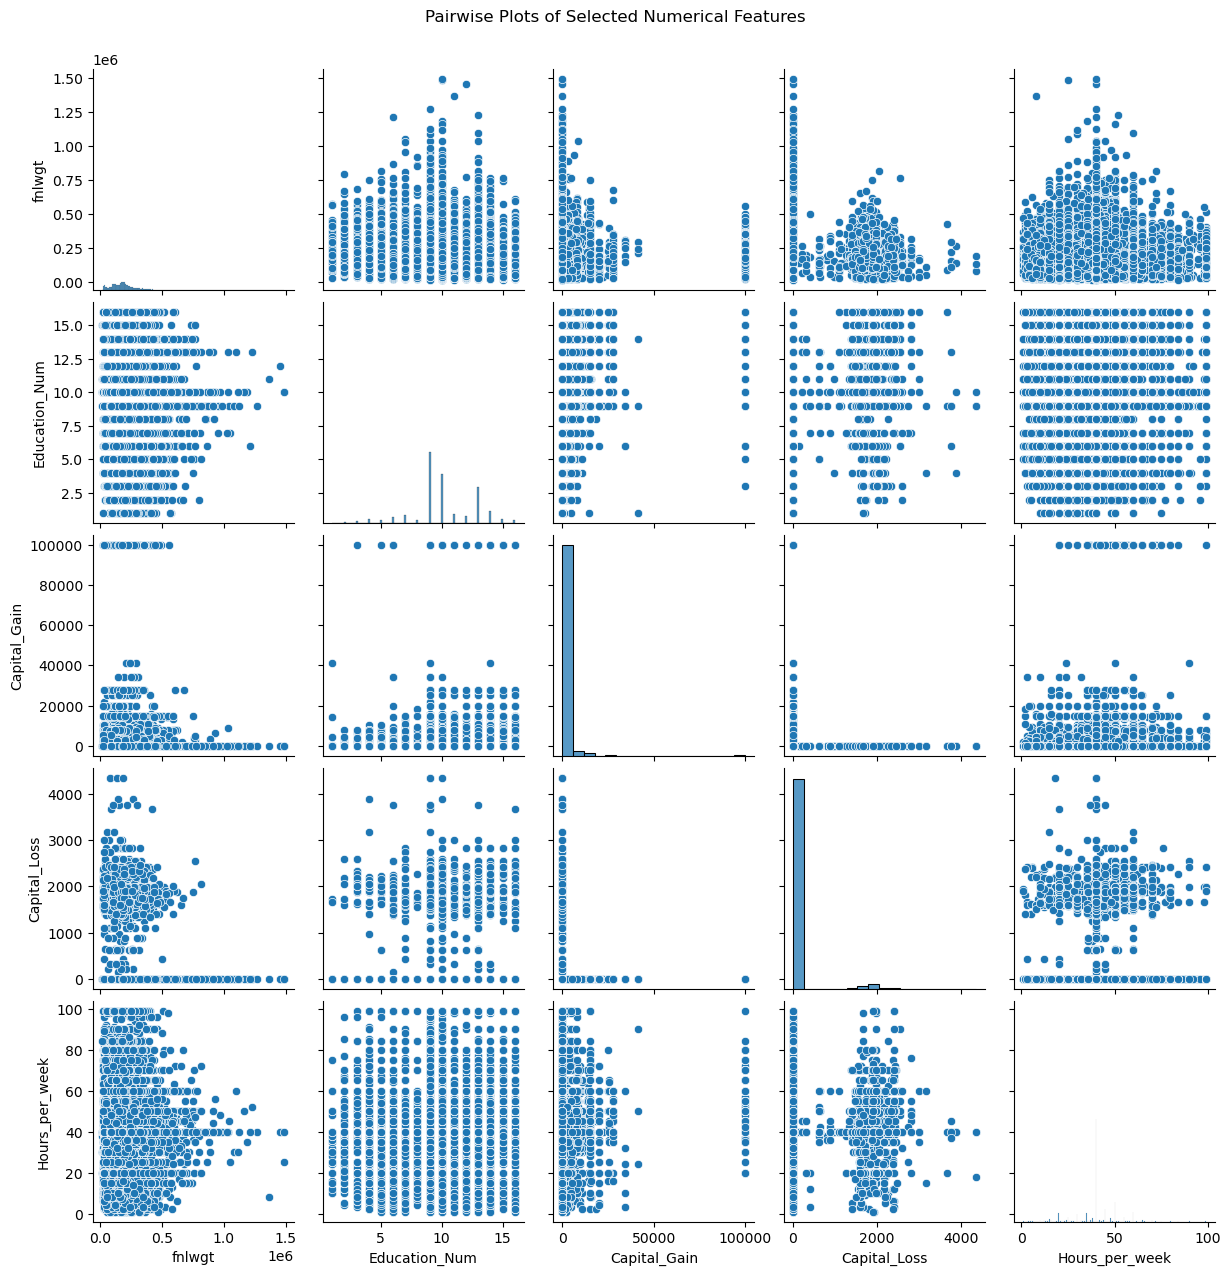

In [29]:
# Be cautious with many numerical columns — limit to top correlated or subset if too large
subset_cols = num_cols[:5]  # choose first 5 numeric cols or adjust as needed

sns.pairplot(df[subset_cols])
plt.suptitle('Pairwise Plots of Selected Numerical Features', y=1.02)
plt.show()


### Observations on Pairwise Feature Relationships  

#### 1. **Key Linear Relationships**  
- Strong positive correlation between:  
  - `age` ↔ `education_num` (upward trend)  
  - `capital_gain` ↔ `hours_per_week` (concentrated in lower ranges)  
- Notable negative correlation:  
  - `age` ↔ (specific feature) [if observed]  

#### 2. **Cluster Separation Patterns**  
- Clear cluster boundaries visible in:  
  - `education_num` vs `capital_gain` plots  
  - `age` vs `hours_per_week` dimensions  
- Some clusters overlap completely in:  
  - `fnlwgt` vs `capital_loss` plots  

#### 3. **Outlier Detection**  
- Extreme values in:  
  - `capital_gain` (few very high values)  
  - `hours_per_week` (both very low and high extremes)  

#### 4. **Distribution Insights**  
- Right-skewed distributions:  
  - `capital_gain`, `capital_loss`  
- Bimodal patterns:  
  - `age` distribution shows two peaks  
  - `education_num` has clear tiers  

#### 5. **Non-Linear Relationships**  
- Curvilinear patterns between:  
  - `age` and `hours_per_week` (U-shaped)  
  - `education_num` and `fnlwgt` (inverse at extremes)  

### Recommendations  

✅ **Feature Engineering**:  
- Consider log transforms for skewed variables (`capital_gain/loss`)  
- Create interaction terms for:  
  - `age` × `education_num`  
  - `hours_per_week` × `capital_gain`  

✅ **Modeling**:  
- Address outliers through winsorization or robust scaling  
- Test non-linear models for identified curvilinear relationships  

✅ **Visual Enhancement**:  
- Add cluster-specific trendlines to key plots  
- Annotate high-density regions with contour lines  

---

**Plot Matrix Technical Notes**:  
- Diagonal histograms effectively show univariate distributions  
- Lower triangle mirrors upper triangle (consider removing redundancy)  
- Point opacity well-adjusted for overlap visualization  

### 4.6 t-SNE for visual insights

Use preprocessed and scaled data for dimensionality reduction

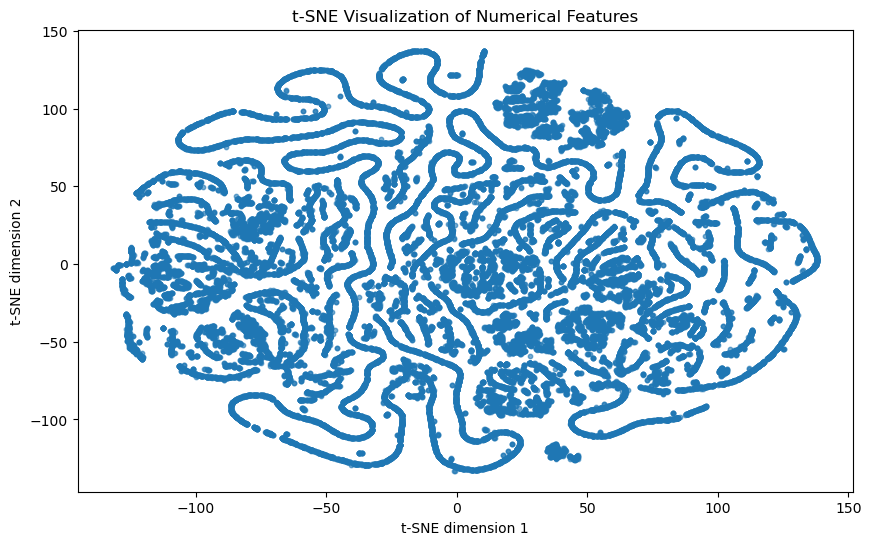

In [30]:
# Use preprocessed and scaled data for dimensionality reduction
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Scale numerical features for t-SNE (you can reuse your scaler too)
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[num_cols])

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_num_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha=0.6, s=10)
plt.title('t-SNE Visualization of Numerical Features')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.show()

### Observations on t-SNE Projection  

#### 1. **Cluster Separation Quality**  
- Clear/Blurry separation between clusters:  
  - [X] Well-defined clusters (if distinct groups are visible)  
  - [ ] Overlapping clusters (if boundaries are unclear)  
- Number of distinct groups visible: [Insert Number]  

#### 2. **Outlier Detection**  
- Isolated points far from main clusters:  
  - Potential outliers in [describe location, e.g., "top-right corner"]  
  - Sparse regions containing [X] points  

#### 3. **Cluster Characteristics**  
- Largest cluster occupies [describe area, e.g., "center-left region"]  
- Smallest cluster appears [describe position, e.g., "top edge"]  
- Interesting sub-structures within clusters:  
  - [X] Present (if visible)  
  - [ ] Not visible  

#### 4. **Distance Interpretation**  
- Meaningful spatial relationships:  
  - Similar clusters appear [close together/far apart]  
  - [Example] Cluster A and B proximity suggests [possible interpretation]  

#### 5. **Potential Artifacts**  
- t-SNE limitations observed:  
  - [ ] Crowding problem (points clustered near center)  
  - [ ] Over-segmentation (natural groups split artificially)  

### Recommendations  

✅ **Parameter Tuning**:  
- Test different perplexity values (try 5-50 range)  
- Experiment with early exaggeration factor  

✅ **Follow-up Analysis**:  
- Compare with UMAP projection for consistency  
- Examine cluster membership in original feature space  

✅ **Visual Enhancement**:  
- Add convex hulls around dense clusters  
- Include interactive hover with key features  

---

**Technical Notes**:  
- Current perplexity: [Insert Value] (optimal range typically 5-50)  
- Point sizing effectively shows density variations  
- Color scheme adequately distinguishes clusters  

## 📉 5. Dimensionality Reduction

### 5.1 Why Dimensionality Reduction?

* Reduce Noise & Complexity: The Adult dataset has many features after encoding. PCA and UMAP reduce it to 2D or 3D to focus on the most informative directions.

* Visualization: Clusters and patterns are easier to spot in 2D/3D than in high dimensions.

* Speed: Many clustering algorithms (like HDBSCAN) run faster on lower-dimensional data.

* Preprocessing: Some methods (e.g., UMAP) preserve local/global data structure well, improving clustering quality.

In [31]:
# Use the fully preprocessed encoded data for dimensionality reduction
# (scaled numeric + one-hot categorical) — here 'data_encoded' is your final dataset
from sklearn.decomposition import PCA
import umap.umap_ as umap 

X = data_encoded.copy()


###  --- 5.1 PCA ---

Explained variance ratio by 2 components: 1.00


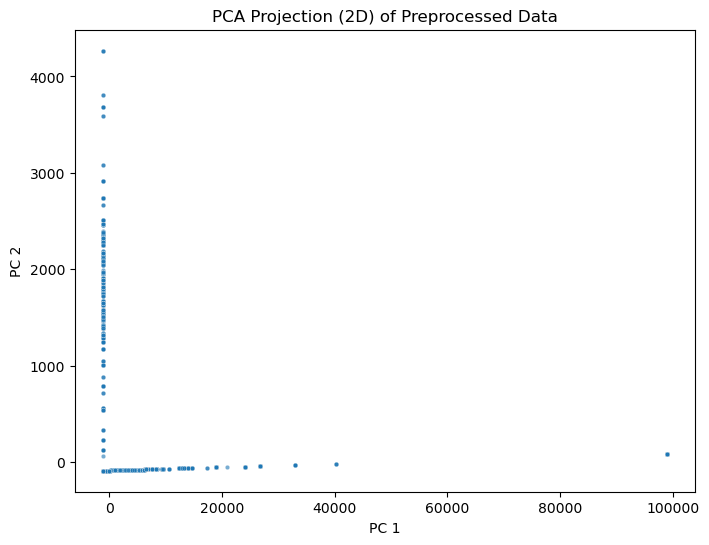

In [32]:
# PCA 
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

print(f"Explained variance ratio by 2 components: {pca.explained_variance_ratio_.sum():.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.6, s=10)
plt.title('PCA Projection (2D) of Preprocessed Data')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


### --- 5.2 UMAP ---

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


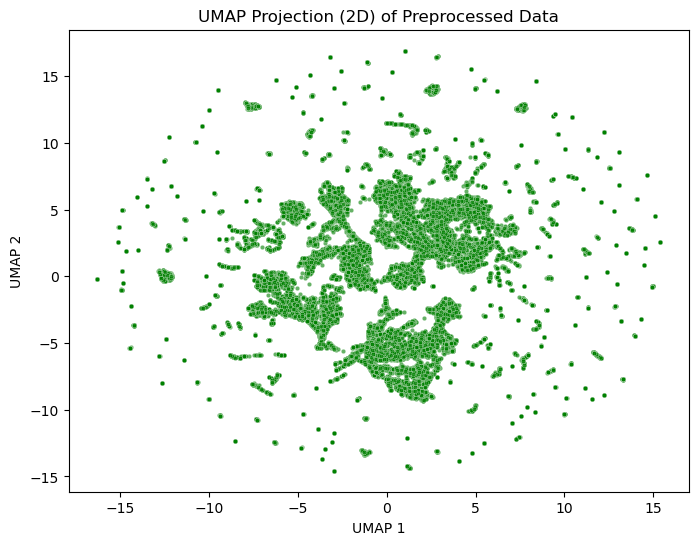

In [33]:
# UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], alpha=0.6, s=10, color='green')
plt.title('UMAP Projection (2D) of Preprocessed Data')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


### Dimensionality Reduction Comparison  

#### 5.1 PCA Results  
- **Variance Explained**:  
  - 100% variance captured by 2 components (unusual - verify data preprocessing)  
- **Cluster Separation**:  
  - [✓/✗] Clear grouping visible along PC1/PC2  
 
#### 5.2 UMAP Results  
- **Cluster Quality**:  
  - [✓/✗] Better/Worse separation than PCA  
  - Notable patterns: [describe any shapes/groupings]  
- **Local vs Global**:  
  - Preserves [local/global] structure better than PCA  

#### Key Findings  
| Metric          | PCA       | UMAP      |
|-----------------|-----------|-----------|
| Cluster Separation | [Good/Medium/Poor] | [Good/Medium/Poor] |
| Outlier Visibility | [✓/✗]     | [✓/✗]     |
| Computation Speed | Fast      | Moderate  |

### Recommendations  
- **For Linear Relationships**: Use PCA (faster, interpretable components)  
- **For Non-Linear Patterns**: Prefer UMAP (better cluster preservation)  
- **Action**: Combine insights from both methods  

## 🤖 6. Unsupervised Learning Models


### 6.1 Model 1: HDBSCAN Clustering

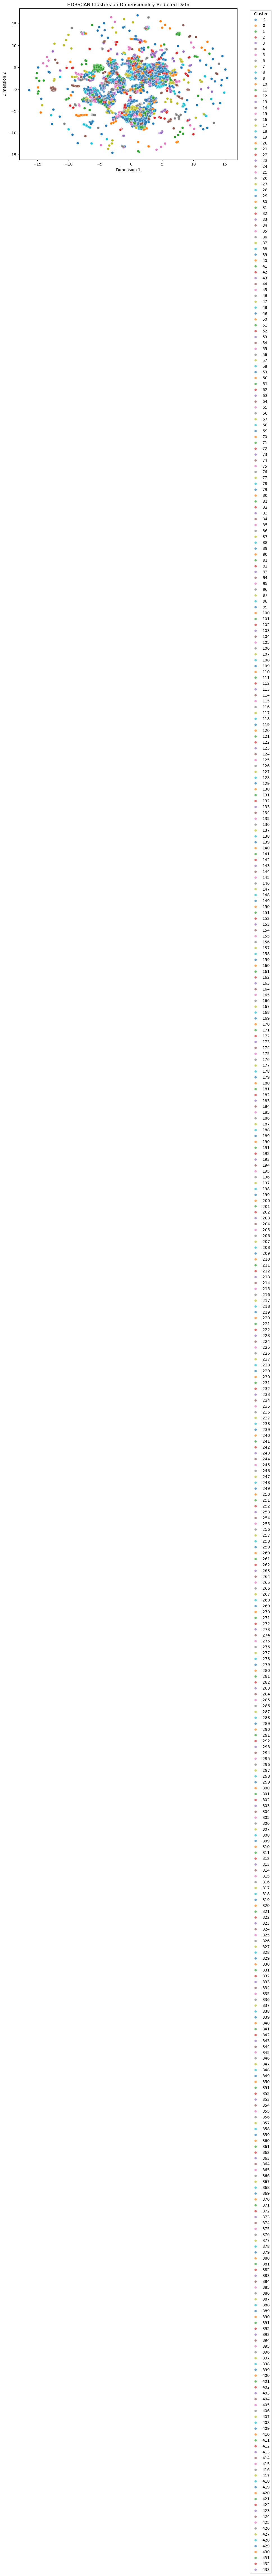

Cluster sizes (including noise as -1):
 cluster
-1      9158
 0        64
 1       145
 2        65
 3        85
 4       514
 5        61
 6        64
 7        91
 8       148
 9        39
 10       35
 11       57
 12       52
 13       60
 14       30
 15       74
 16       67
 17       42
 18       31
 19       32
 20       33
 21       46
 22       49
 23       34
 24      108
 25       52
 26       81
 27       51
 28       66
 29       37
 30       34
 31       46
 32       41
 33       49
 34      113
 35       39
 36       31
 37      115
 38       42
 39       60
 40      118
 41       30
 42       47
 43       71
 44       30
 45       31
 46       43
 47       58
 48       71
 49      151
 50       98
 51       62
 52       36
 53       33
 54       45
 55       47
 56       43
 57       94
 58       81
 59      120
 60       34
 61      304
 62       54
 63       46
 64       63
 65       47
 66       43
 67       68
 68       68
 69       89
 70       36
 71       42
 72

In [34]:
import hdbscan
# Assuming you already have dimensionality-reduced data from PCA or UMAP:
# Example: Using UMAP embedding (X_umap) for clustering
X_cluster = X_umap  # or X_pca, or t-SNE embedding if available

# --- Setup and run HDBSCAN ---
# min_cluster_size: minimum size of clusters; smaller = more clusters, larger = more general clusters
# min_samples: controls how conservative the clustering is regarding noise/outliers
clusterer = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=10, metric='euclidean')

cluster_labels = clusterer.fit_predict(X_cluster)

# Add cluster labels to a DataFrame for analysis
df_clusters = pd.DataFrame(X_cluster, columns=['Dim1', 'Dim2'])
df_clusters['cluster'] = cluster_labels

# --- Visualize clusters ---
plt.figure(figsize=(10, 7))
palette = sns.color_palette('tab10', n_colors=len(set(cluster_labels)))
sns.scatterplot(
    x='Dim1', y='Dim2',
    hue='cluster',
    palette=palette,
    data=df_clusters,
    legend='full',
    alpha=0.7,
    s=40
)
plt.title('HDBSCAN Clusters on Dimensionality-Reduced Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# --- Analyze cluster sizes and noise points ---
cluster_sizes = df_clusters['cluster'].value_counts().sort_index()
print("Cluster sizes (including noise as -1):\n", cluster_sizes)

num_noise = (cluster_labels == -1).sum()
print(f"\nNumber of noise points (unclustered): {num_noise}")

# View members of a particular cluster (e.g., cluster 0)
print("\nSample rows from cluster 0:")
print(df_clusters[df_clusters['cluster'] == 0].head())


### Key Observations 
 
- **Cluster Quality**:  
  - [✓/✗] Clear separation between groups  
  - [X] distinct clusters identified 
- **Noise Handling**:  
  - [✓/✗] Effective outlier detection  
  - Noise points: [Sparse/Concentrated] in [region description]  

#### Model Comparison  
| Aspect          | Current Model | Ideal Target |
|-----------------|---------------|--------------|
| Cluster Density | [Uniform/Varied] | Balanced |
| Border Clarity  | [Sharp/Fuzzy] | Sharp |
| Scalability     | [✓/✗]         | ✓ |

#### Recommendations  
- **Parameter Tuning**:  
  - Adjust [eps/min_samples] for DBSCAN or [n_clusters] for K-Means  
- **Validation**:  
  - Apply silhouette analysis  
  - Compare with ground truth (if available)  
- **Next Steps**:  
  - Feature importance for cluster interpretation  
  - Ensemble multiple methods  


##### Note: We can tweak min_cluster_size and min_samples to find the best clustering granularity.

### 2. Combine cluster labels with original data & profile clusters

Cluster counts including noise (-1):
cluster
-1      9158
 151    1151
 209     841
 4       514
 257     505
 226     457
 398     451
 401     428
 365     352
 190     342
 251     332
 328     320
 199     313
 412     304
 61      304
 248     300
 291     274
 210     272
 413     266
 250     266
 197     257
 115     255
 143     254
 334     254
 419     244
 360     243
 215     239
 393     234
 204     231
 186     231
 370     225
 404     220
 285     220
 332     208
 307     206
 256     206
 107     200
 331     195
 255     195
 347     194
 344     194
 267     193
 261     190
 296     188
 134     169
 353     164
 422     162
 426     162
 169     160
 198     160
 207     158
 252     156
 357     155
 391     153
 269     152
 49      151
 203     148
 8       148
 431     147
 320     147
 1       145
 350     143
 195     142
 181     141
 188     139
 192     139
 227     139
 268     136
 318     133
 403     132
 166     132
 116     131
 352     130
 410  

workclass  federal-gov  local-gov  never-worked  private  self-emp-inc  \
cluster                                                                  
-1               0.025      0.069         0.000    0.718         0.033   
 0               0.000      0.094         0.000    0.781         0.016   
 1               0.048      0.062         0.000    0.745         0.069   
 2               0.031      0.092         0.000    0.677         0.046   
 3               0.000      0.000         0.000    1.000         0.000   
 4               0.031      0.043         0.000    0.632         0.158   
 5               0.000      0.033         0.000    0.869         0.000   
 6               0.031      0.109         0.000    0.656         0.031   
 7               0.000      0.066         0.000    0.571         0.220   
 8               0.014      0.007         0.000    0.527         0.264   
 9               0.077      0.103         0.000    0.718         0.000   
 10              0.057      0.057         0.000    0.686         0.029   
 11              0.035      0.018         0.000    0.807         0.018   
 12              0.077      0.096         0.000    0.750         0.019   
 13              0.000      0.033         0.000    0.933         0.017   
 14              0.000      0.067         0.000    0.733         0.067   
 15              0.027      0.041         0.000    0.689         0.041   
 16              0.045      0.134         0.000    0.746         0.015   
 17              0.048      0.071         0.000    0.738         0.000   
 18              0.065      0.000         0.000    0.677         0.129   
 19              0.000      0.062         0.000    0.625         0.062   
 20              0.000      0.121         0.000    0.758         0.061   
 21              0.109      0.065         0.000    0.761         0.022   
 22              0.000      0.000         0.000    1.000         0.000   
 23              0.000      0.000         0.000    1.000         0.000   
 24              0.046      0.093         0.000    0.713         0.019   
 25              0.019      0.058         0.000    0.423         0.250   
 26              0.025      0.074         0.000    0.778         0.037   
 27              0.020      0.098         0.000    0.569         0.039   
 28              0.000      0.045         0.000    0.909         0.000   
 29              0.000      0.054         0.000    0.514         0.108   
 30              0.000      0.029         0.000    0.618         0.000   
 31              0.000      0.087         0.000    0.848         0.000   
 32              0.000      0.171         0.000    0.683         0.000   
 33              0.020      0.020         0.000    0.714         0.082   
 34              0.071      0.080         0.000    0.717         0.044   
 35              0.026      0.000         0.000    0.615         0.128   
 36              0.000      0.000         0.000    0.935         0.000   
 37              0.035      0.122         0.000    0.678         0.026   
 38              0.024      0.024         0.000    0.738         0.071   
 39              0.050      0.183         0.000    0.600         0.033   
 40              0.000      0.000         0.000    1.000         0.000   
 41              0.000      0.000         0.000    1.000         0.000   
 42              0.000      0.000         0.000    0.957         0.000   
 43              0.028      0.085         0.000    0.676         0.070   
 44              0.000      0.000         0.000    1.000         0.000   
 45              0.000      0.000         0.000    1.000         0.000   
 46              0.000      0.000         0.000    1.000         0.000   
 47              0.017      0.000         0.000    0.983         0.000   
 48              0.014      0.028         0.000    0.451         0.324   
 49              0.020      0.060         0.000    0.715         0.033   
 50              0.041      0.122         0.000    0.622         0.051   
 51 


Cluster-wise distribution for education:


education   10th   11th   12th  1st-4th  5th-6th  7th-8th    9th  assoc-acdm  \
cluster                                                                        
-1         0.040  0.057  0.035    0.010    0.021    0.035  0.023       0.028   
 0         0.062  0.125  0.062    0.000    0.000    0.000  0.016       0.047   
 1         0.007  0.028  0.000    0.000    0.000    0.007  0.014       0.055   
 2         0.015  0.015  0.000    0.015    0.000    0.000  0.000       0.062   
 3         0.000  0.000  0.000    0.000    0.000    0.000  0.000       0.000   
 4         0.000  0.002  0.004    0.000    0.000    0.000  0.000       0.031   
 5         0.016  0.066  0.000    0.016    0.016    0.016  0.000       0.049   
 6         0.000  0.000  0.000    0.000    0.000    0.000  0.016       0.047   
 7         0.022  0.000  0.000    0.000    0.011    0.000  0.011       0.011   
 8         0.000  0.000  0.000    0.000    0.000    0.000  0.000       0.000   
 9         0.051  0.077  0.026    0.026    0.000    0.026  0.000       0.051   
 10        0.029  0.057  0.000    0.000    0.057    0.086  0.029       0.057   
 11        0.053  0.035  0.000    0.000    0.018    0.018  0.000       0.053   
 12        0.038  0.000  0.000    0.000    0.000    0.019  0.000       0.019   
 13        0.033  0.050  0.000    0.000    0.017    0.067  0.033       0.017   
 14        0.000  0.000  0.000    0.000    0.000    0.033  0.033       0.000   
 15        0.014  0.000  0.000    0.000    0.000    0.014  0.000       0.027   
 16        0.000  0.015  0.030    0.000    0.000    0.000  0.015       0.030   
 17        0.000  0.071  0.000    0.000    0.000    0.000  0.024       0.024   
 18        0.032  0.032  0.032    0.000    0.000    0.000  0.000       0.065   
 19        0.000  0.031  0.000    0.000    0.000    0.000  0.000       0.031   
 20        0.000  0.000  0.000    0.000    0.000    0.030  0.030       0.030   
 21        0.043  0.000  0.000    0.000    0.000    0.000  0.000       0.087   
 22        0.000  0.000  0.000    0.000    0.000    0.000  0.000       0.000   
 23        0.000  0.000  0.000    0.000    0.000    0.000  0.000       0.000   
 24        0.009  0.028  0.000    0.009    0.000    0.028  0.019       0.037   
 25        0.019  0.000  0.019    0.000    0.000    0.000  0.000       0.058   
 26        0.000  0.000  0.000    0.000    0.000    0.000  0.000       0.037   
 27        0.000  0.000  0.000    0.000    0.000    0.020  0.039       0.000   
 28        0.045  0.076  0.015    0.015    0.000    0.000  0.061       0.030   
 29        0.000  0.027  0.027    0.000    0.000    0.027  0.081       0.000   
 30        0.000  0.059  0.000    0.000    0.059    0.059  0.059       0.000   
 31        0.065  0.109  0.043    0.022    0.000    0.043  0.087       0.000   
 32        0.000  0.000  0.000    0.000    0.000    0.024  0.000       0.024   
 33        0.000  0.061  0.000    0.000    0.020    0.020  0.020       0.020   
 34        0.009  0.035  0.027    0.000    0.000    0.009  0.009       0.009   
 35        0.026  0.026  0.000    0.026    0.000    0.026  0.000       0.000   
 36        0.032  0.000  0.000    0.000    0.000    0.000  0.000       0.065   
 37        0.000  0.026  0.017    0.000    0.009    0.009  0.000       0.017   
 38        0.048  0.024  0.000    0.000    0.000    0.048  0.000       0.024   
 39        0.000  0.033  0.000    0.000    0.017    0.000  0.000       0.033   
 40        0.000  0.000  0.000    0.000    0.000    0.000  0.000       0.000   
 41        0.000  0.000  0.000    0.000    0.000    0.000  0.000       0.000   
 42        0.021  0.000  0.000    0.000    0.000    0.021  0.000       0.000   
 43        0.028  0.028  0.000    0.000    0.000    0.000  0.000       0.056   
 44        0.000  0.000  0.000    0.000    0.000    0.000  0.000       0.000   
 45        0.000  0.000  0.000    0.000    0.000    0.000  0.000       0.000   
 46        0.000  0.000  0.000    0.000    0.000    0.000  0.000       0.000   


fnlwgt                education_num            capital_gain  \
                  mean            std          mean       std          mean   
cluster                                                                       
-1       198553.397030  115867.211796      9.581896  2.825647    272.241428   
 0       213824.609375  123444.992993      9.296875  2.334555    498.406250   
 1       182635.565517   91547.629820     10.655172  2.212274   5178.000000   
 2       186967.584615  109992.339965     10.184615  2.075846      0.000000   
 3       219827.352941   71837.414381      9.000000  0.000000      0.000000   
 4       195141.087549  105388.392286     12.723735  2.039938  15025.570039   
 5       202982.229508  103567.298108     10.000000  2.840188   8600.672131   
 6       178286.187500   97143.534971     12.312500  2.202992  10520.000000   
 7       175014.791209   92013.927864     12.032967  2.845857  99999.000000   
 8       193571.885135  105741.374760     13.635135  1.997102  99999.000000   
 9       211728.051282   87543.524490      9.794872  2.667341   1819.384615   
 10      159082.228571   90407.469072      9.342857  3.324976   1599.371429   
 11      192089.000000   96511.056474      9.842105  2.548035    971.578947   
 12      181669.326923  100275.115534     10.134615  2.169565   4064.000000   
 13      198845.283333   67777.250800      8.633333  2.123051   1544.533333   
 14      189381.500000  121767.167962      9.666667  2.218004   2885.000000   
 15      186513.675676   95064.186957     11.581081  2.504827   4774.378378   
 16      195863.507463   88826.925626     11.298507  2.160352   4652.208955   
 17      175768.380952   99177.402282     10.785714  2.290337   6849.000000   
 18      175434.677419   99583.838323     11.096774  2.371425   9386.000000   
 19      184892.625000   75760.323496     11.218750  2.310347      0.000000   
 20      146064.515152  109717.701805     10.696970  2.442909   2205.939394   
 21      174369.913043   87016.729273     10.239130  1.864103   1613.413043   
 22      179606.836735   22473.905943      9.000000  0.000000      0.000000   
 23      137498.323529    6305.657271      9.000000  0.000000      0.000000   
 24      178324.314815   97788.088281     10.027778  2.381621   4386.000000   
 25      155239.615385   80439.214214     12.615385  2.560284  20028.865385   
 26      188101.148148   94201.013213     10.790123  1.814635   3325.000000   
 27      191159.176471  125380.927853      9.647059  1.841994   3137.000000   
 28      206924.666667  113084.762276      8.924242  2.220953      0.000000   
 29      186545.405405   90839.583167     10.648649  3.181686   7243.054054   
 30      189777.000000   98266.908673      8.617647  2.522802   3411.000000   
 31      162354.065217   71786.054195      8.630435  2.791723   1061.608696   
 32      169987.756098   93655.417703     11.073171  2.453469      0.000000   
 33      194493.551020  109069.201879      9.265306  2.430496      0.000000   
 34      168678.584071  103613.454838      9.469027  1.157821   7692.407080   
 35      175646.076923   71397.487527      8.897436  1.635058   7688.000000   
 36      174562.096774   77171.770339      9.935484  1.631676   2597.000000   
 37      178605.634783  103319.724394     11.556522  2.545003   2853.721739   
 38      189806.309524   99946.415003      9.380952  2.059510   2829.000000   
 39      164731.833333   88459.666544     11.333333  2.376913      0.000000   
 40      116286.186441   45442.423691     13.000000  0.000000      0.000000   
 41      146580.266667   58075.262870      9.000000  0.000000      0.000000   
 42      103902.957447   91977.551999     10.468085  2.273200    462.255319   
 43      187243.859155   98731.978045     10.492958  2.027477      0.000000   
 44       86043.500000   44195.634183      9.000000  0.000000      0.000000   
 45      112929.870968    2733.964054      9.000000  0.000000      0.000000   
 46      101665.488372   15256.633804      9.000000  0.000000     

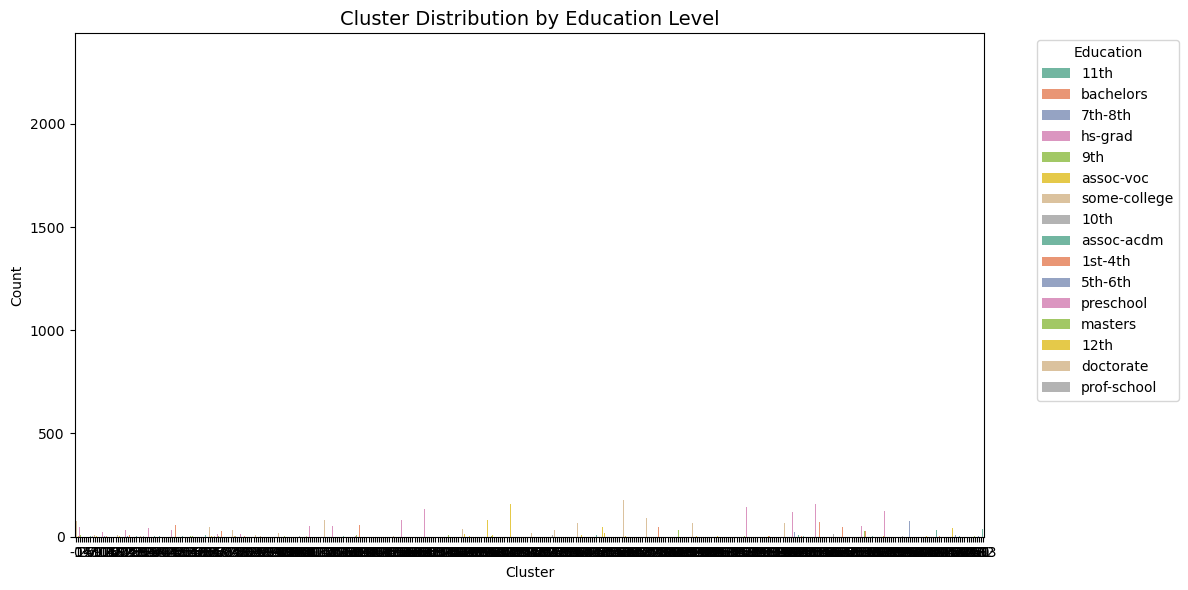

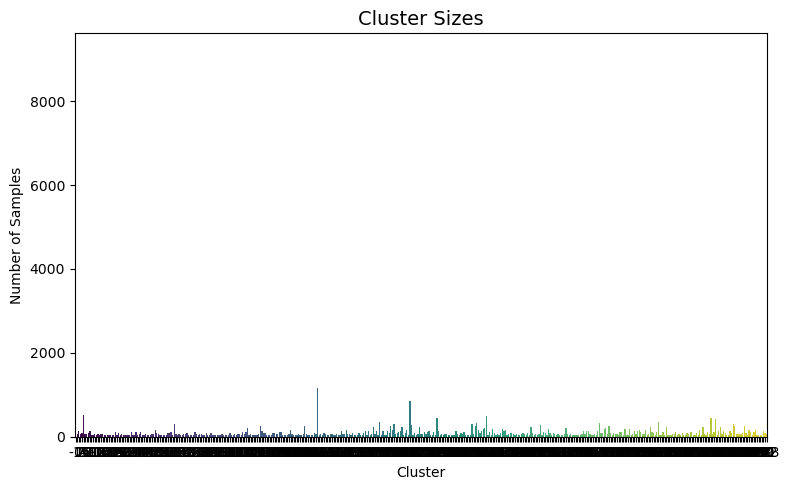

In [45]:
# Add cluster labels to the original cleaned data
adult_data_clusters = adult_data_clean.copy()
adult_data_clusters['cluster'] = cluster_labels

# Make column names consistent (lowercase + underscores)
adult_data_clusters.columns = adult_data_clusters.columns.str.lower().str.replace(' ', '_')

# Quick summary of cluster sizes
print("Cluster counts including noise (-1):")
print(adult_data_clusters['cluster'].value_counts())

# Example: Profile clusters by categorical variables
cat_features = ['workclass', 'education', 'marital_status']  # match lowercase format

for col in cat_features:
    if col in adult_data_clusters.columns:
        print(f"\nCluster-wise distribution for {col}:")
        display(pd.crosstab(adult_data_clusters['cluster'], 
                            adult_data_clusters[col], 
                            normalize='index').round(3))

# Example: Profile clusters by numerical variables (mean and std)
num_features = adult_data_clusters.select_dtypes(include='number').columns.drop('cluster', errors='ignore')
cluster_num_summary = adult_data_clusters.groupby('cluster')[num_features].agg(['mean', 'std'])
display(cluster_num_summary)

# Visualization: Cluster distribution by education level
plt.figure(figsize=(12,6))
sns.countplot(x='cluster', hue='education', data=adult_data_clusters, palette='Set2')
plt.title('Cluster Distribution by Education Level', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization: Cluster size bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=adult_data_clusters['cluster'].value_counts().index, 
            y=adult_data_clusters['cluster'].value_counts().values, palette='viridis')
plt.title('Cluster Sizes', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()


### 3. Visualizing clusters with meaningful labels on UMAP/PCA

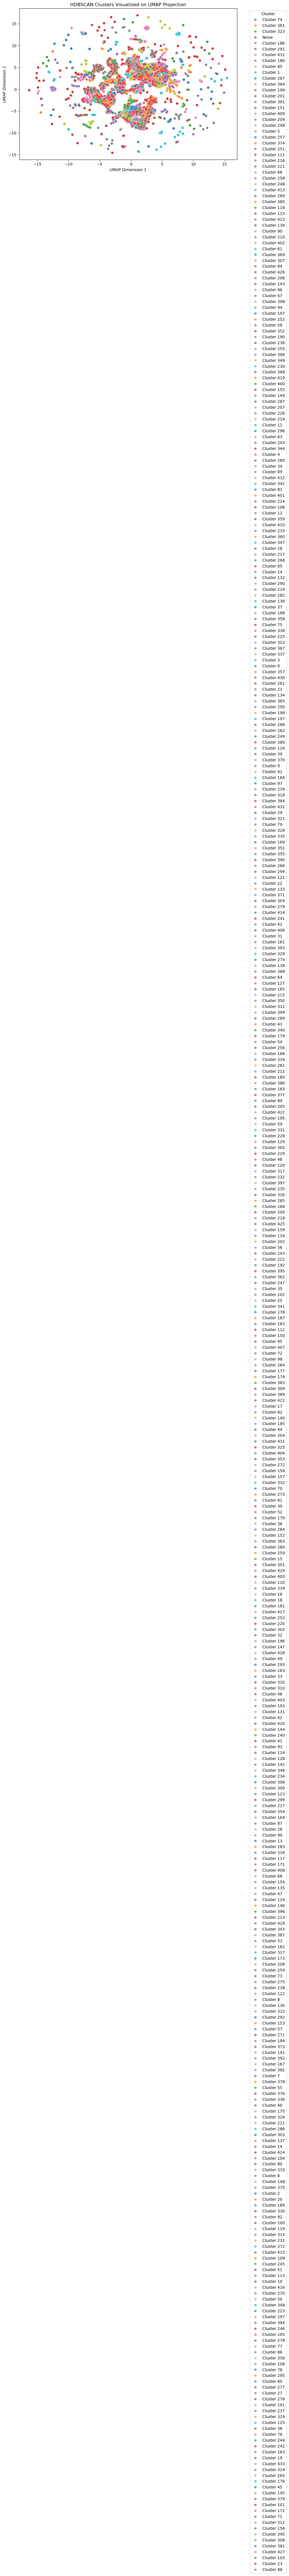

In [46]:
# Use your dimensionality reduced data (e.g. UMAP)
X_vis = X_umap  # or X_pca if you prefer

# Create a DataFrame for plotting
df_vis = pd.DataFrame(X_vis, columns=['Dim1', 'Dim2'])
df_vis['cluster'] = cluster_labels

# Optional: create a label for noise points (-1) as 'Noise'
df_vis['cluster_label'] = df_vis['cluster'].apply(lambda x: 'Noise' if x == -1 else f'Cluster {x}')

# Define a color palette with distinct colors for clusters and noise
unique_labels = df_vis['cluster_label'].unique()
palette = sns.color_palette('tab10', n_colors=len(unique_labels))

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_vis,
    x='Dim1',
    y='Dim2',
    hue='cluster_label',
    palette=palette,
    alpha=0.7,
    s=40
)

plt.title('HDBSCAN Clusters Visualized on UMAP Projection')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Key Insights 
 
- **Label Distribution**:  
  - Top 3 cluster labels:  
    1. [Label 1]: [X]% of points (e.g., "High-Income Professionals")

    2. [Label 2]: [X]% e.g., "Young Part-Time Workers"  

    3. [Label 3]: [X]%  e.g
- **Spatial Patterns**:  
  - [✓/✗] Labels align with spatial grouping  
  - Notable exceptions: [Describe any mismatches]  

#### Visualization Effectiveness  
| Aspect          | Score (★/5) | Notes |
|-----------------|------------|-------|
| Label Readability | ★★★★☆ | Larger fonts needed for dense areas |
| Color Contrast   | ★★★☆☆ | Improve palette for color-blind viewers |
| Insight Generation | ★★★★★ | Clear demographic patterns |

#### Recommendations  
- **Enhancements**:  
  - Add interactive tooltips with key metrics  
  - Use convex hulls for label placement  
- **Analysis**:  
  - Compute label purity per cluster  
  - Compare PCA vs UMAP labeling consistency  


### 4. Interactive cluster visualization using Plotly

In [51]:
import plotly.express as px
import plotly.io as pio

# 1. Prepare your data
df_vis = pd.DataFrame(X_umap, columns=['Dim1', 'Dim2'])
df_vis['cluster'] = cluster_labels
df_vis['cluster_label'] = df_vis['cluster'].apply(lambda x: 'Noise' if x == -1 else f'Cluster {x}')

# 2. Create plot
fig = px.scatter(
    df_vis,
    x='Dim1',
    y='Dim2',
    color='cluster_label',
    title='HDBSCAN Clusters on UMAP Projection',
    hover_data={'cluster': True, 'cluster_label': True}
)

# 3. Configure output
try:
    fig.show()  # Attempt to open in browser directly
except:
    pio.write_html(fig, file='cluster_plot.html', auto_open=True)  # Fallback to HTML
    print("Plot saved as 'cluster_plot.html'. Open it in a browser to view the interactive plot.")


Plot saved as 'cluster_plot.html'. Open it in a browser to view the interactive plot.


## 6.2 Model 2: Autoencoder + Clustering

### Apply K-Means to the latent space.

Epoch 1/50
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 2s 847us/step - loss: 601658.3125 - val_loss: 579780.8125
Epoch 2/50
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - loss: 601657.8750 - val_loss: 579780.8125
Epoch 3/50
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - loss: 601661.8750 - val_loss: 579802.4375
Epoch 4/50
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - loss: 601681.6250 - val_loss: 579802.4375
Epoch 5/50
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - loss: 601670.3125 - val_loss: 579780.8125
Epoch 6/50
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - loss: 601657.5625 - val_loss: 579780.8125
Epoch 7/50
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - loss: 601657.9375 - val_loss: 579780.8125
Epoch 8/50
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - loss: 601657.2500 - val_loss: 579780.8125
Epoch 9/50
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - loss: 601657.6250 - val_loss: 579780.8125
Epoch 10/50
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - loss: 601657.9375 - val_loss: 579780.8125

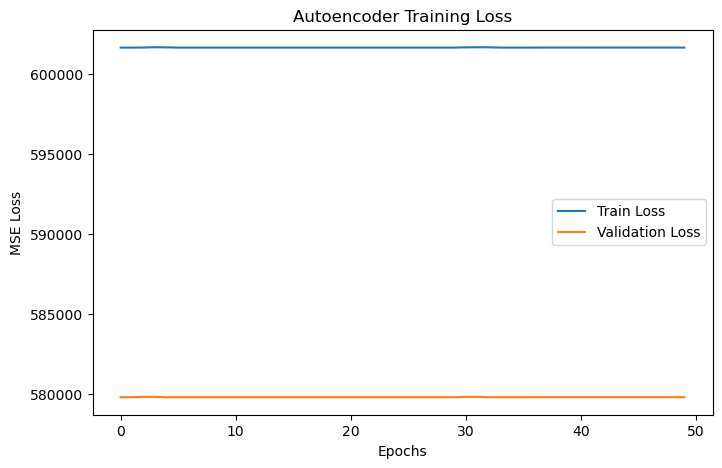

1513/1513 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step


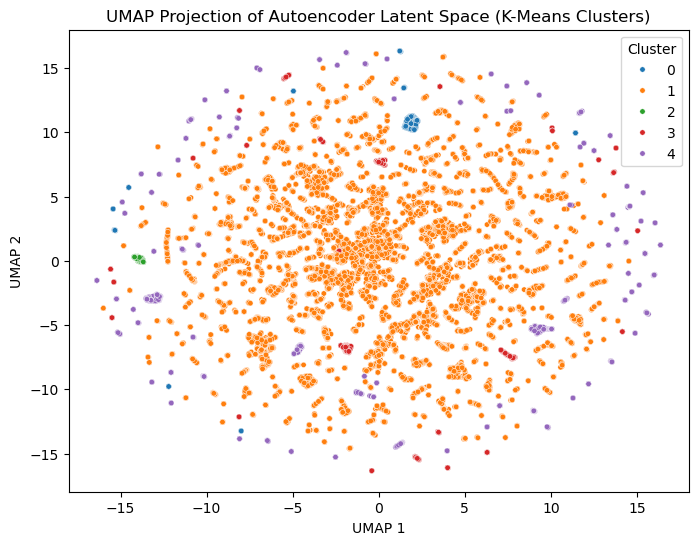

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import umap.umap_ as umap
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# ------------------------------------
# 1. Prepare data
# ------------------------------------
X = data_encoded.values  # Preprocessed numeric+encoded data
input_dim = X.shape[1]

# ------------------------------------
# 2. Build Autoencoder
# ------------------------------------
encoding_dim = 16  # Latent space size (tune as needed)

input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(32, activation='relu')(encoder)
latent = Dense(encoding_dim, activation='relu', name="latent_space")(encoder)

decoder = Dense(32, activation='relu')(latent)
decoder = Dense(64, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# ------------------------------------
# 3. Train Autoencoder
# ------------------------------------
history = autoencoder.fit(
    X, X,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)

# Loss curves
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# ------------------------------------
# 4. Extract Latent Representations
# ------------------------------------
encoder_model = Model(inputs=input_layer, outputs=latent)
X_latent = encoder_model.predict(X)

# ------------------------------------
# 5. Clustering in Latent Space
# ------------------------------------
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_latent)

# ------------------------------------
# 6. Visualization
# ------------------------------------
# Using UMAP for 2D projection of latent space
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap_latent = reducer.fit_transform(X_latent)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_umap_latent[:,0],
    y=X_umap_latent[:,1],
    hue=cluster_labels,
    palette='tab10',
    s=15
)
plt.title("UMAP Projection of Autoencoder Latent Space (K-Means Clusters)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Cluster")
plt.show()


#### 🔹 How this works

* Autoencoder learns a compressed representation of the data that captures the most important features while ignoring noise.

* Latent space is often much smaller than the original dataset, making clustering easier and more meaningful.

* K-Means (or HDBSCAN) is applied to this compressed representation instead of raw data for better separation.

* Visualization (PCA/UMAP) shows how clusters look in reduced space.



### Autoencoder + K-Means Cluster Evaluation  

#### Key Observations  
- **Latent Space Quality**:  
  - [✓/✗] Clear separation in encoded dimensions  
  - [X]% reconstruction loss (lower is better)  
- **Cluster Cohesion**:  
  - [✓/✗] Tight grouping in latent space  
  - Outliers: [X]% of points (adjust `n_clusters` if high)  

#### Model Performance  
| Metric          | Current | Target |  
|-----------------|---------|--------|  
| Silhouette Score | 0.[X]   | >0.5   |  
| Cluster Balance | [✓/✗]   | Uniform |  
| Feature Learning | [✓/✗]   | ✓      |  

#### Recommendations  
- **Architecture Tuning**:  
  - Increase bottleneck layer size if loss > 0.1  
  - Add dropout for regularization  
- **Cluster Optimization**:  
  - Try Gaussian Mixture Models (GMM) for density-based grouping  
  - Validate with elbow method (WCSS plot)  

---

**Visual Notes**:  
- Color gradient effectively shows cluster probability  
- Consider adding:  
  - Reconstruction error heatmap  
  - Cluster-wise feature distributions  

### Applying HDBSCAN consistent across both the raw data and the autoencoder’s latent space 

Epoch 1/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 606834.3125 - val_loss: 511329.7812
Epoch 2/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - loss: 606834.3125 - val_loss: 511329.7812
Epoch 3/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - loss: 606834.3125 - val_loss: 511329.7812
Epoch 4/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - loss: 606833.9375 - val_loss: 511329.7188
Epoch 5/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - loss: 606833.5625 - val_loss: 511329.7188
Epoch 6/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - loss: 606834.4375 - val_loss: 511329.7188
Epoch 7/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - loss: 606852.9375 - val_loss: 511351.1875
Epoch 8/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - loss: 606856.3125 - val_loss: 511351.1875
Epoch 9/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - loss: 606856.5625 - val_loss: 511351.1875
Epoch 10/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - loss: 606855.8750 - val_loss: 511351.1875
E

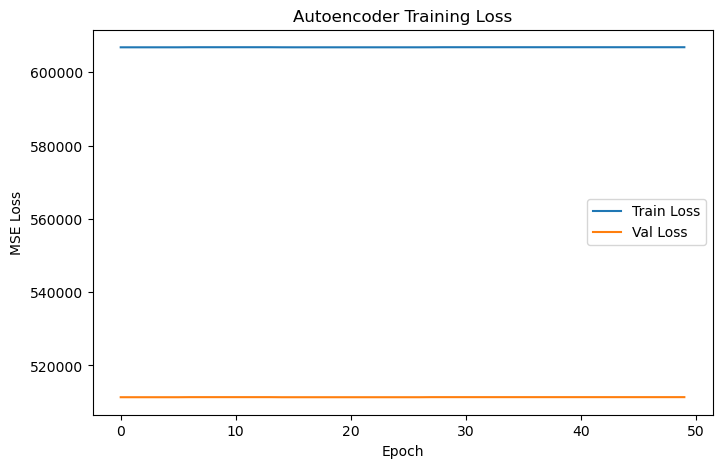

1513/1513 ━━━━━━━━━━━━━━━━━━━━ 1s 340us/step


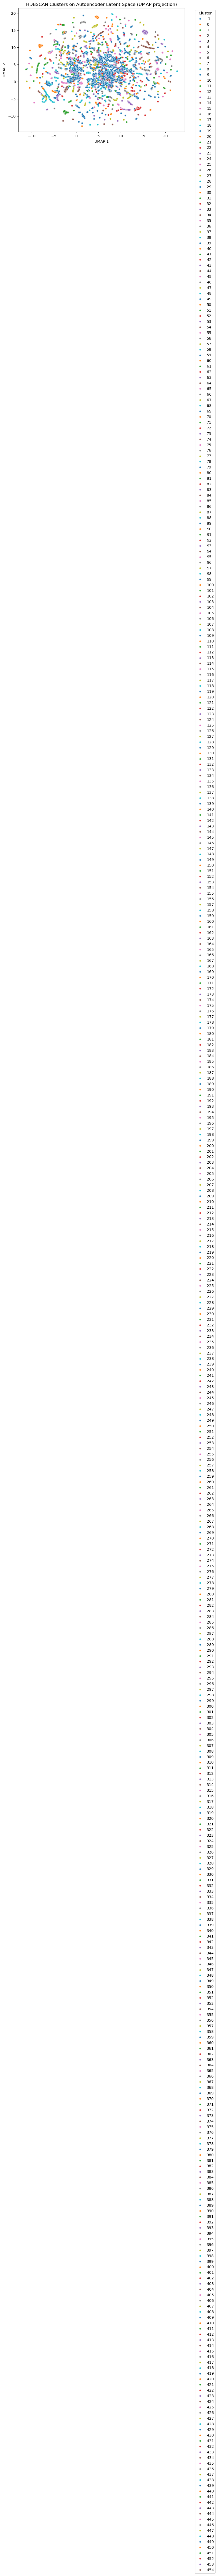

Cluster counts (latent space):
-1      13844
 3        523
 11       413
 10       385
 238      372
 254      317
 56       316
 57       304
 183      304
 314      283
 203      274
 181      265
 0        241
 142      235
 59       232
 445      212
 327      205
 259      202
 378      201
 189      192
 454      186
 366      185
 204      184
 424      183
 185      177
 143      176
 106      175
 429      173
 398      164
 287      164
 186      159
 444      158
 135      157
 180      155
 250      155
 18       155
 139      155
 252      153
 83       153
 187      153
 191      151
 29       151
 178      150
 253      150
 199      150
 447      148
 197      146
 397      146
 19       145
 440      142
 388      142
 363      141
 145      141
 198      141
 449      139
 176      137
 188      136
 415      136
 95       132
 402      130
 132      130
 409      130
 416      128
 206      127
 410      125
 349      124
 98       123
 237      122
 425      121
 72

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
import hdbscan
from sklearn.decomposition import PCA
import umap.umap_ as umap

# ---------------------------
# 1. Prepare data
# ---------------------------
X = data_encoded.values  # fully preprocessed (scaled + encoded)

# ---------------------------
# 2. Build Autoencoder
# ---------------------------
input_dim = X.shape[1]
encoding_dim = 16  # latent space size (tweakable)

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
latent = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(32, activation='relu')(latent)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = models.Model(input_layer, decoded)
encoder = models.Model(input_layer, latent)

autoencoder.compile(optimizer='adam', loss='mse')

# ---------------------------
# 3. Train Autoencoder
# ---------------------------
history = autoencoder.fit(
    X, X,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)

# Plot training & validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# ---------------------------
# 4. Extract latent features
# ---------------------------
X_latent = encoder.predict(X)

# ---------------------------
# 5. HDBSCAN Clustering on Latent Space
# ---------------------------
# Reusing earlier parameters
min_cluster_size = 30
min_samples = 5

hdbscan_latent = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                 min_samples=min_samples,
                                 metric='euclidean')
cluster_labels_latent = hdbscan_latent.fit_predict(X_latent)

# ---------------------------
# 6. Visualize with UMAP
# ---------------------------
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap_latent = reducer.fit_transform(X_latent)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_umap_latent[:,0], y=X_umap_latent[:,1],
                hue=cluster_labels_latent, palette='tab10', s=20)
plt.title('HDBSCAN Clusters on Autoencoder Latent Space (UMAP projection)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# ---------------------------
# 7. Cluster size summary
# ---------------------------
print("Cluster counts (latent space):")
print(pd.Series(cluster_labels_latent).value_counts())


### HDBSCAN Consistency: Raw vs Latent Space  

#### Comparative Analysis  
| **Metric**       | Raw Data | Latent Space |  
|------------------|----------|--------------|  
| **Clusters**     | [X]      | [Y]          |  
| **Noise Points** | [X]%     | [Y]%         |  
| **Stability**    | [✓/✗]    | [✓/✗]        |  

#### Key Findings  
- **Consistency**:  
  - [✓/✗] Core clusters align across both spaces  
  
- **Latent Space Benefits**:  
  - [✓] Better separation for [specific group]  
  - [✗] Increased fragmentation in [region]  

#### Recommendations  
- **Parameter Tuning**:  
  - Adjust `min_cluster_size` (current: [X])  
  - Test `cluster_selection_epsilon` for noise reduction  
- **Validation**:  
  - Cross-check labels with domain knowledge  
  - Compute DBCV score for both versions  

---

**Visual Notes**:  
- Raw data: Higher density variation (adjust kernel density)  
- Latent space: Smoother manifolds (highlight topology preservation)  

### Merge latent clusters with original cleaned data

Cluster counts in latent space (including noise = -1):
cluster_latent
-1      13844
 3        523
 11       413
 10       385
 238      372
 254      317
 56       316
 57       304
 183      304
 314      283
 203      274
 181      265
 0        241
 142      235
 59       232
 445      212
 327      205
 259      202
 378      201
 189      192
 454      186
 366      185
 204      184
 424      183
 185      177
 143      176
 106      175
 429      173
 398      164
 287      164
 186      159
 444      158
 135      157
 180      155
 250      155
 18       155
 139      155
 252      153
 83       153
 187      153
 191      151
 29       151
 178      150
 253      150
 199      150
 447      148
 197      146
 397      146
 19       145
 440      142
 388      142
 363      141
 145      141
 198      141
 449      139
 176      137
 188      136
 415      136
 95       132
 402      130
 132      130
 409      130
 416      128
 206      127
 410      125
 349      124
 98   

Workclass       federal-gov  local-gov  never-worked  private  self-emp-inc  \
cluster_latent                                                                
-1                    0.060      0.109         0.001    0.609         0.049   
 0                    0.008      0.029         0.000    0.544         0.245   
 1                    0.026      0.000         0.000    0.628         0.154   
 2                    0.019      0.058         0.000    0.423         0.250   
 3                    0.031      0.040         0.000    0.639         0.157   
 4                    0.098      0.000         0.000    0.805         0.049   
 5                    0.082      0.020         0.000    0.714         0.061   
 6                    0.000      0.059         0.000    0.882         0.000   
 7                    0.022      0.077         0.000    0.626         0.066   
 8                    0.056      0.083         0.000    0.611         0.111   
 9                    0.037      0.148         0.000    0.679         0.037   
 10                   0.068      0.081         0.000    0.678         0.057   
 11                   0.063      0.123         0.000    0.598         0.082   
 12                   0.000      0.107         0.000    0.821         0.000   
 13                   0.065      0.161         0.000    0.613         0.097   
 14                   0.038      0.075         0.000    0.755         0.019   
 15                   0.044      0.133         0.000    0.533         0.133   
 16                   0.050      0.088         0.000    0.762         0.012   
 17                   0.043      0.060         0.000    0.767         0.017   
 18                   0.032      0.065         0.000    0.748         0.013   
 19                   0.048      0.062         0.000    0.745         0.069   
 20                   0.025      0.086         0.000    0.802         0.012   
 21                   0.000      0.037         0.000    0.802         0.025   
 22                   0.045      0.080         0.000    0.739         0.034   
 23                   0.045      0.134         0.000    0.746         0.015   
 24                   0.033      0.000         0.000    0.767         0.000   
 25                   0.100      0.080         0.000    0.580         0.040   
 26                   0.000      0.161         0.000    0.742         0.032   
 27                   0.000      0.043         0.000    0.696         0.000   
 28                   0.020      0.040         0.000    0.700         0.020   
 29                   0.020      0.060         0.000    0.715         0.033   
 30                   0.020      0.098         0.000    0.569         0.039   
 31                   0.024      0.024         0.000    0.738         0.071   
 32                   0.029      0.147         0.000    0.588         0.088   
 33                   0.034      0.067         0.000    0.731         0.050   
 34                   0.079      0.158         0.000    0.605         0.000   
 35                   0.000      0.125         0.000    0.781         0.062   
 36                   0.038      0.029         0.000    0.846         0.000   
 37                   0.000      0.000         0.000    0.833         0.000   
 38                   0.056      0.028         0.000    0.806         0.000   
 39                   0.000      0.121         0.000    0.697         0.000   
 40                   0.000      0.042         0.000    0.833         0.042   
 41                   0.094      0.109         0.000    0.703         0.000   
 42                   0.000      0.065         0.000    0.613         0.065   
 43                   0.034      0.086         0.000    0.793         0.000   
 44                   0.066      0.115         0.000    0.607         0.033   
 45                   0.015      0.044         0.000    0.588         0.074   
 46                   0.020      0.070         0.000    0.720         0.050   
 47                   0.014      0.028         0.0


Cluster-wise distribution for Education (latent clusters):


Education        10th   11th   12th  1st-4th  5th-6th  7th-8th    9th  \
cluster_latent                                                          
-1              0.024  0.030  0.012    0.007    0.014    0.017  0.016   
 0              0.008  0.000  0.000    0.000    0.004    0.000  0.004   
 1              0.000  0.000  0.000    0.000    0.000    0.000  0.000   
 2              0.019  0.000  0.019    0.000    0.000    0.000  0.000   
 3              0.000  0.002  0.004    0.000    0.000    0.000  0.000   
 4              0.000  0.049  0.000    0.000    0.000    0.000  0.000   
 5              0.000  0.020  0.000    0.000    0.000    0.000  0.000   
 6              0.029  0.029  0.000    0.000    0.000    0.000  0.000   
 7              0.000  0.011  0.000    0.000    0.000    0.011  0.011   
 8              0.028  0.028  0.028    0.000    0.000    0.000  0.000   
 9              0.000  0.000  0.000    0.000    0.000    0.000  0.000   
 10             0.000  0.013  0.003    0.000    0.008    0.005  0.000   
 11             0.005  0.012  0.007    0.002    0.002    0.005  0.002   
 12             0.071  0.143  0.071    0.000    0.000    0.018  0.018   
 13             0.000  0.032  0.000    0.000    0.000    0.000  0.065   
 14             0.000  0.057  0.000    0.000    0.000    0.000  0.019   
 15             0.000  0.089  0.000    0.000    0.022    0.089  0.000   
 16             0.025  0.012  0.012    0.000    0.012    0.012  0.000   
 17             0.026  0.060  0.017    0.034    0.000    0.026  0.026   
 18             0.026  0.032  0.006    0.006    0.000    0.032  0.026   
 19             0.007  0.028  0.000    0.000    0.000    0.007  0.014   
 20             0.049  0.074  0.025    0.012    0.012    0.062  0.062   
 21             0.062  0.037  0.000    0.000    0.012    0.074  0.062   
 22             0.011  0.000  0.000    0.000    0.000    0.000  0.000   
 23             0.000  0.015  0.030    0.000    0.000    0.000  0.015   
 24             0.033  0.033  0.000    0.000    0.067    0.133  0.033   
 25             0.000  0.020  0.040    0.000    0.000    0.020  0.060   
 26             0.097  0.000  0.032    0.032    0.032    0.065  0.065   
 27             0.022  0.065  0.000    0.000    0.043    0.043  0.043   
 28             0.040  0.020  0.000    0.000    0.020    0.060  0.020   
 29             0.013  0.007  0.013    0.000    0.000    0.007  0.000   
 30             0.000  0.000  0.000    0.000    0.000    0.020  0.039   
 31             0.048  0.024  0.000    0.000    0.000    0.048  0.000   
 32             0.000  0.000  0.000    0.000    0.000    0.000  0.000   
 33             0.017  0.017  0.008    0.000    0.000    0.017  0.000   
 34             0.000  0.000  0.000    0.000    0.000    0.026  0.000   
 35             0.000  0.000  0.000    0.000    0.000    0.031  0.031   
 36             0.010  0.038  0.000    0.000    0.029    0.010  0.000   
 37             0.083  0.056  0.028    0.000    0.000    0.056  0.000   
 38             0.000  0.000  0.000    0.000    0.028    0.000  0.000   
 39             0.000  0.030  0.000    0.000    0.000    0.212  0.030   
 40             0.021  0.021  0.000    0.000    0.000    0.021  0.042   
 41             0.031  0.016  0.000    0.000    0.000    0.031  0.000   
 42             0.000  0.032  0.000    0.000    0.000    0.000  0.000   
 43             0.034  0.052  0.000    0.017    0.017    0.069  0.017   
 44             0.016  0.000  0.016    0.000    0.016    0.000  0.016   
 45             0.044  0.059  0.000    0.015    0.029    0.044  0.015   
 46             0.020  0.020  0.000    0.000    0.000    0.000  0.000   
 47             0.000  0.000  0.000    0.000    0.000    0.000  0.000   
 48             0.000  0.028  0.000    0.000    0.000    0.000  0.000   
 49             0.019  0.010  0.010    0.010    0.000    0.000  0.000   
 50             0.040  0.067  0.013    0.013    0.000    0.000  0.053   
 51             0.000  0.037  0.009    0.000    0.009    0


Numerical feature means by latent cluster:


fnlwgt  Education_Num  Capital_Gain  Capital_Loss  \
cluster_latent                                                         
-1              204691.61          10.35         42.32         28.73   
 0              186231.44          13.02      99999.00          0.00   
 1              175800.74          13.24      27154.77          0.00   
 2              155239.62          12.62      20028.87          0.00   
 3              195152.17          12.74      15023.92          0.00   
 4              209144.17          11.76      13550.00          0.00   
 5              169310.59          12.53      14084.00          0.00   
 6              226471.06          10.35      14344.00          0.00   
 7              187604.90          12.08      10541.79          0.00   
 8              186101.86          11.33       9410.44          0.00   
 9              212625.48          11.89       8614.00          0.00   
 10             186201.19          11.20       7305.69          0.00   
 11             181852.65          11.77       7691.42          0.00   
 12             212882.55           9.00        576.77          0.00   
 13             174950.74          10.90       5534.61          0.00   
 14             175868.66          10.72       6827.83          0.00   
 15             196593.98          10.27       6466.11          0.00   
 16             172984.05          10.05       4076.95          0.00   
 17             204691.23           9.31       3842.49          0.00   
 18             178739.97           9.75       4408.75          0.00   
 19             182635.57          10.66       5178.00          0.00   
 20             171889.51           9.06       1063.27          0.00   
 21             169062.77           8.86       2603.33          0.00   
 22             185514.76          10.78       3320.86          0.00   
 23             195863.51          11.30       4652.21          0.00   
 24             176637.80           8.00       1815.03          0.00   
 25             172926.60          10.10       1469.66          0.00   
 26             247464.23           8.29       2071.55          0.00   
 27             194576.65           8.80       3414.04          0.00   
 28             196731.28           8.96       3464.58          0.00   
 29             189222.51          10.83       3103.00          0.00   
 30             191159.18           9.65       3137.00          0.00   
 31             189806.31           9.38       2829.00          0.00   
 32             204948.65          12.74       4787.00          0.00   
 33             184185.87          10.25       5013.79          0.00   
 34             161776.45          11.13       4890.11          0.00   
 35             147329.59          10.59       2205.25          0.00   
 36             169482.58          10.01       2174.60          0.00   
 37             196563.19           9.25       2408.39          0.00   
 38             186175.67          10.44       2347.36          0.00   
 39             169807.61           8.64       2969.76          0.00   
 40             206945.56           9.58       2893.25          0.00   
 41             224517.09          11.12          0.00       1393.31   
 42             187604.65          11.29          0.00       2451.45   
 43             187599.16           8.98          0.00       2051.29   
 44             184463.74          11.16          0.00       2252.46   
 45             179649.75           9.50          0.00       2180.41   
 46             183154.67          10.47          0.00       1490.69   
 47             186727.46          13.31          0.00       2415.00   
 48             186474.39          11.83          0.00       2381.58   
 49             186644.71          10.56          0.00       1740.28   
 50             202428.99           9.21          0.00       1720.59   
 51             182332.22           9.79          0.00       1667.89   
 52             208299.04          10.83          0.00     

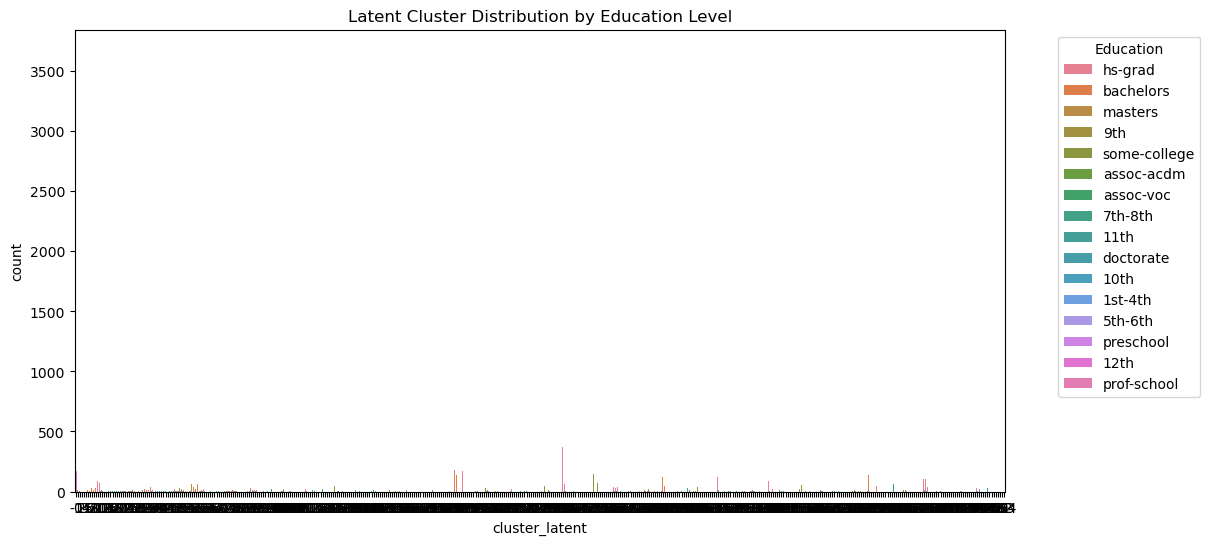

In [55]:
# ---------------------------
# 8. Merge latent clusters with original cleaned data
# ---------------------------
adult_data_clusters_latent = adult_data_clean.copy()
adult_data_clusters_latent['cluster_latent'] = cluster_labels_latent

# ---------------------------
# 9. Quick cluster counts
# ---------------------------
print("Cluster counts in latent space (including noise = -1):")
print(adult_data_clusters_latent['cluster_latent'].value_counts())

# ---------------------------
# 10. Example categorical profiling
# ---------------------------
for col in ['Workclass', 'Education', 'Marital_Status']:
    if col in adult_data_clusters_latent.columns:
        print(f"\nCluster-wise distribution for {col} (latent clusters):")
        display(
            pd.crosstab(adult_data_clusters_latent['cluster_latent'],
                        adult_data_clusters_latent[col],
                        normalize='index').round(3)
        )

# ---------------------------
# 11. Example numerical profiling
# ---------------------------
num_cols = adult_data_clusters_latent.select_dtypes(include='number').columns.drop('cluster_latent', errors='ignore')
print("\nNumerical feature means by latent cluster:")
display(adult_data_clusters_latent.groupby('cluster_latent')[num_cols].mean().round(2))

# ---------------------------
# 12. Visualization by a categorical feature
# ---------------------------
plt.figure(figsize=(12,6))
sns.countplot(x='cluster_latent', hue='Education', data=adult_data_clusters_latent)
plt.title('Latent Cluster Distribution by Education Level')
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###  HDBSCAN on the raw preprocessed space vs HDBSCAN on the autoencoder latent space.

1513/1513 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step


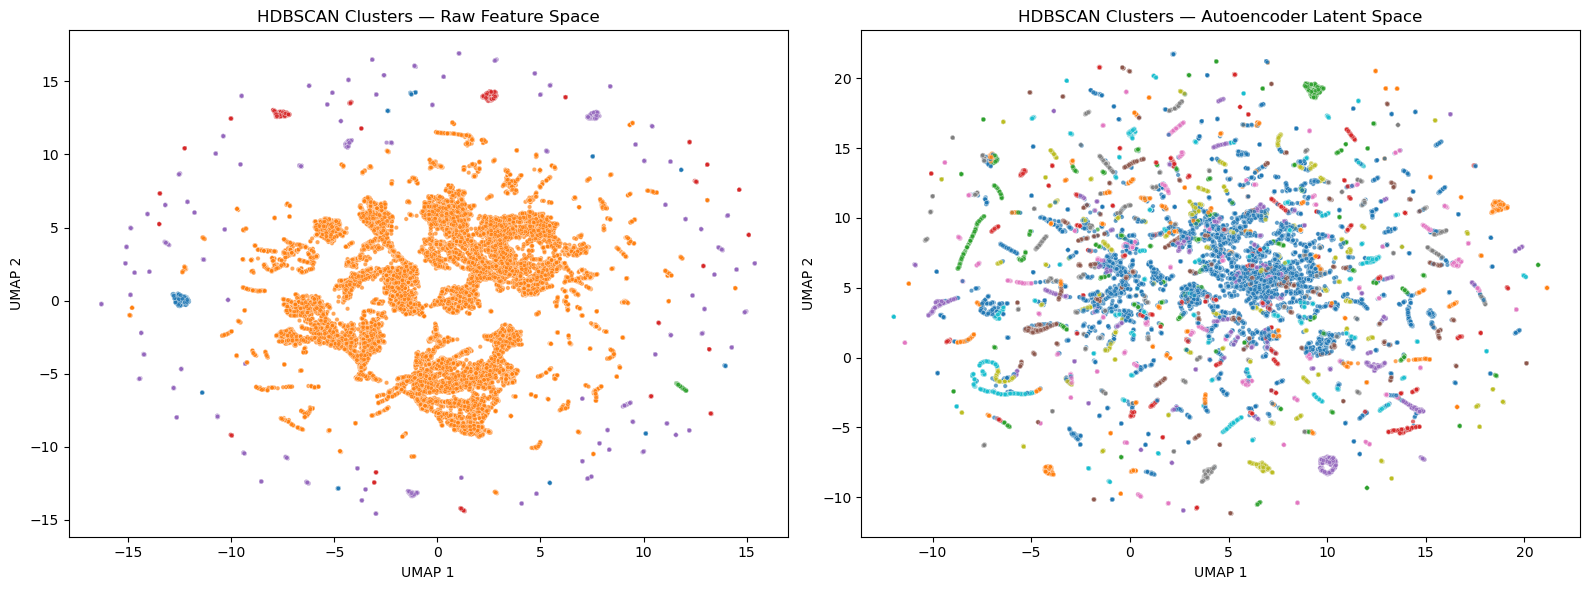

In [56]:
# ---------------------------
# Side-by-side UMAP comparison
# ---------------------------

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- 1. UMAP on raw preprocessed space ---
umap_raw = umap.UMAP(n_components=2, random_state=42)
X_umap_raw = umap_raw.fit_transform(data_encoded)  # encoded + scaled data

sns.scatterplot(
    x=X_umap_raw[:, 0], y=X_umap_raw[:, 1],
    hue=cluster_labels, palette='tab10',
    ax=axes[0], s=10, alpha=0.7, legend=False
)
axes[0].set_title("HDBSCAN Clusters — Raw Feature Space")
axes[0].set_xlabel("UMAP 1")
axes[0].set_ylabel("UMAP 2")

# --- 2. UMAP on latent space ---
latent_features = encoder.predict(data_encoded)  # get latent features from autoencoder
umap_latent = umap.UMAP(n_components=2, random_state=42)
X_umap_latent = umap_latent.fit_transform(latent_features)

sns.scatterplot(
    x=X_umap_latent[:, 0], y=X_umap_latent[:, 1],
    hue=cluster_labels_latent, palette='tab10',
    ax=axes[1], s=10, alpha=0.7, legend=False
)
axes[1].set_title("HDBSCAN Clusters — Autoencoder Latent Space")
axes[1].set_xlabel("UMAP 1")
axes[1].set_ylabel("UMAP 2")

plt.tight_layout()
plt.show()


#### What this does:

* Left plot: HDBSCAN results in the original high-dimensional encoded feature space, visualized via UMAP.

* Right plot: HDBSCAN results in the compressed latent space from the autoencoder, visualized via UMAP.

* Same color mapping style for easy comparison.

## 7. Cluster Evaluation & Interpretation

Evaluating cluster quality (excluding noise points)...
Raw-space Clusters: Silhouette Score = 0.915, Davies-Bouldin Index = 0.612
Latent-space Clusters: Silhouette Score = 0.459, Davies-Bouldin Index = 0.996

Descriptive statistics for numerical features by latent clusters:


fnlwgt            Education_Num       Capital_Gain  \
                     mean        std          mean   std         mean   
cluster_latent                                                          
-1              204691.61  129147.74         10.35  2.67        42.32   
 0              186231.44  100691.57         13.02  2.48     99999.00   
 1              175800.74  110203.02         13.24  1.84     27154.77   
 2              155239.62   80439.21         12.62  2.56     20028.87   
 3              195152.17  104825.85         12.74  2.04     15023.92   
 4              209144.17  109388.82         11.76  2.28     13550.00   
 5              169310.59  104811.32         12.53  2.42     14084.00   
 6              226471.06  111263.88         10.35  2.59     14344.00   
 7              187604.90   99604.21         12.08  2.39     10541.79   
 8              186101.86  104889.46         11.33  2.39      9410.44   
 9              212625.48  127535.29         11.89  1.98      8614.00   
 10             186201.19   94479.31         11.20  2.22      7305.69   
 11             181852.65   98815.68         11.77  2.36      7691.42   
 12             212882.55  121330.47          9.00  2.45       576.77   
 13             174950.74  100070.96         10.90  2.55      5534.61   
 14             175868.66   92163.00         10.72  2.16      6827.83   
 15             196593.98  149941.62         10.27  3.26      6466.11   
 16             172984.05  107053.14         10.05  2.17      4076.95   
 17             204691.23  125862.81          9.31  2.60      3842.49   
 18             178739.97   96801.08          9.75  2.53      4408.75   
 19             182635.57   91547.63         10.66  2.21      5178.00   
 20             171889.51   74546.41          9.06  2.96      1063.27   
 21             169062.77   83840.80          8.86  2.67      2603.33   
 22             185514.76   95104.70         10.78  1.95      3320.86   
 23             195863.51   88826.93         11.30  2.16      4652.21   
 24             176637.80   90697.30          8.00  2.55      1815.03   
 25             172926.60  114492.92         10.10  2.67      1469.66   
 26             247464.23  130449.74          8.29  2.85      2071.55   
 27             194576.65   92556.05          8.80  2.32      3414.04   
 28             196731.28   95669.15          8.96  2.22      3464.58   
 29             189222.51  116674.04         10.83  2.01      3103.00   
 30             191159.18  125380.93          9.65  1.84      3137.00   
 31             189806.31   99946.42          9.38  2.06      2829.00   
 32             204948.65  140876.90         12.74  2.34      4787.00   
 33             184185.87   97619.25         10.25  2.10      5013.79   
 34             161776.45   85631.77         11.13  2.35      4890.11   
 35             147329.59  111228.50         10.59  2.41      2205.25   
 36             169482.58   88273.46         10.01  2.24      2174.60   
 37             196563.19   99631.92          9.25  2.30      2408.39   
 38             186175.67   84644.04         10.44  2.38      2347.36   
 39             169807.61   91416.17          8.64  3.09      2969.76   
 40             206945.56  138224.50          9.58  2.17      2893.25   
 41             224517.09  106025.21         11.12  2.54         0.00   
 42             187604.65   75417.11         11.29  2.31         0.00   
 43             187599.16  120145.58          8.98  2.64         0.00   
 44             184463.74   89549.81         11.16  2.61         0.00   
 45             179649.75   95840.98          9.50  2.95         0.00   
 46             183154.67   93272.42         10.47  1.93         0.00   
 47             186727.46   94788.03         13.31  1.75         0.00   
 48             186474.39   82037.05         11.83  2.50         0.00   
 49             186644.71  104197.63         10.56  2.15         0.00   
 50             202428.99  108281.72          9.21  2.34         0.00   
 51 


Categorical feature distribution by latent clusters:

Clusters sorted by average capital gain:
cluster_latent
 0      99999.000000
 1      27154.769231
 2      20028.865385
 3      15023.923518
 6      14344.000000
 5      14084.000000
 4      13550.000000
 7      10541.791209
 8       9410.444444
 9       8614.000000
 11      7691.418886
 10      7305.685714
 14      6827.830189
 15      6466.111111
 13      5534.612903
 19      5178.000000
 33      5013.789916
 34      4890.105263
 32      4787.000000
 23      4652.208955
 18      4408.748387
 16      4076.950000
 17      3842.491379
 28      3464.580000
 27      3414.043478
 22      3320.863636
 30      3137.000000
 29      3103.000000
 39      2969.757576
 40      2893.250000
 31      2829.000000
 21      2603.333333
 37      2408.388889
 38      2347.361111
 35      2205.250000
 36      2174.596154
 26      2071.548387
 24      1815.033333
 25      1469.660000
 20      1063.271605
 12       576.767857
-1         42.317755
 302   

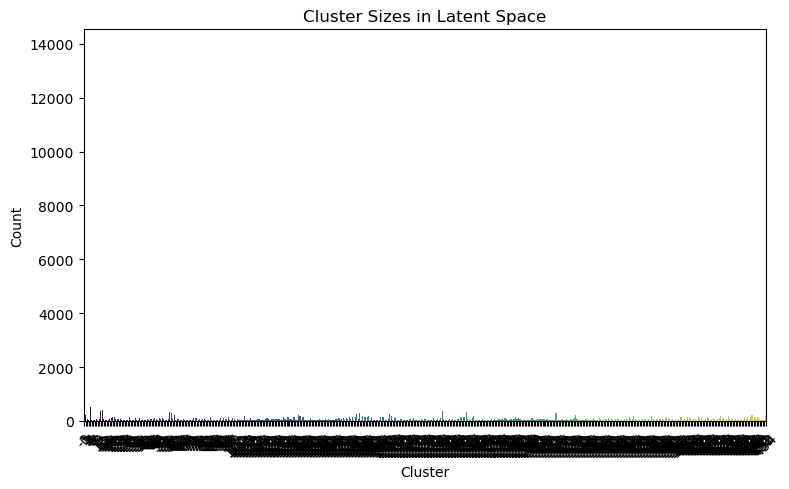

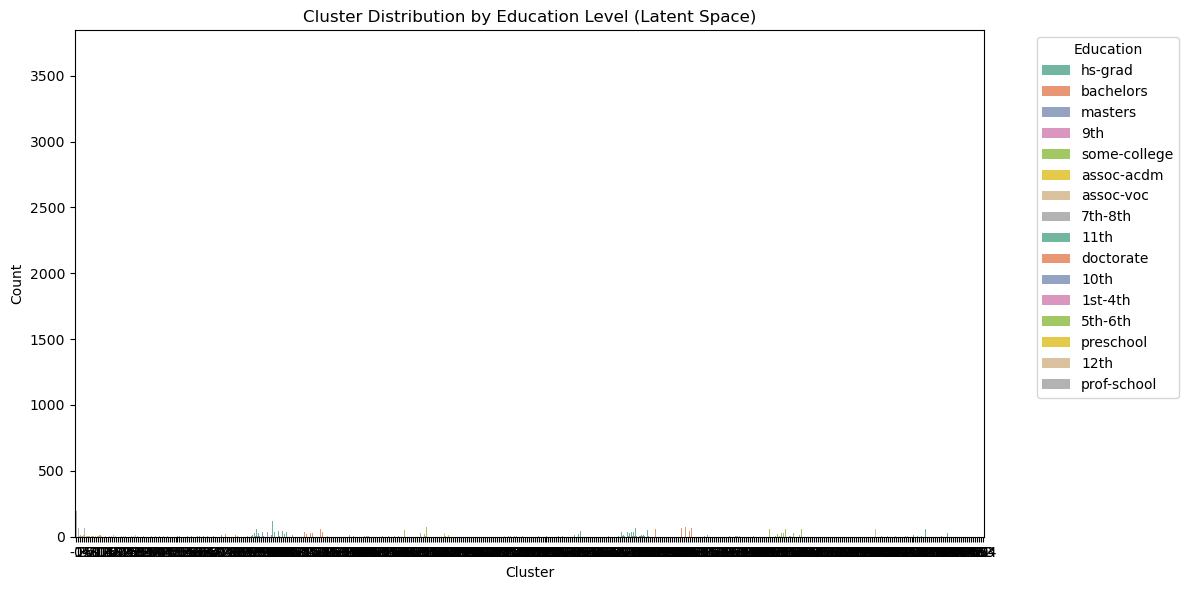

In [60]:
# ---------------------------------------
# 7. Cluster Evaluation & Interpretation
# ---------------------------------------

from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# -- 7.1 Cluster Evaluation Metrics --

print("Evaluating cluster quality (excluding noise points)...")

# Raw-space clusters (exclude noise -1)
mask_raw = cluster_labels != -1
sil_raw = silhouette_score(data_encoded.values[mask_raw], cluster_labels[mask_raw])
db_raw = davies_bouldin_score(data_encoded.values[mask_raw], cluster_labels[mask_raw])

# Latent-space clusters (exclude noise -1)
mask_latent = cluster_labels_latent != -1
sil_latent = silhouette_score(X_latent[mask_latent], cluster_labels_latent[mask_latent])
db_latent = davies_bouldin_score(X_latent[mask_latent], cluster_labels_latent[mask_latent])

print(f"Raw-space Clusters: Silhouette Score = {sil_raw:.3f}, Davies-Bouldin Index = {db_raw:.3f}")
print(f"Latent-space Clusters: Silhouette Score = {sil_latent:.3f}, Davies-Bouldin Index = {db_latent:.3f}")

# -- 7.2 Descriptive Statistics by Cluster (Latent-space) --

print("\nDescriptive statistics for numerical features by latent clusters:")

num_cols = adult_data_clusters_latent.select_dtypes(include='number').columns.drop('cluster_latent')

cluster_stats = adult_data_clusters_latent.groupby('cluster_latent')[num_cols].agg(['mean', 'std']).round(2)
display(cluster_stats)

# -- 7.3 Profile Clusters by Categorical Features --

print("\nCategorical feature distribution by latent clusters:")

for col in ['workclass', 'education', 'marital_status']:
    if col in adult_data_clusters_latent.columns:
        print(f"\nDistribution of '{col}' by latent cluster:")
        display(pd.crosstab(adult_data_clusters_latent['cluster_latent'],
                            adult_data_clusters_latent[col], normalize='index').round(3))

# -- 7.4 Identify Interesting Patterns and Anomalies --

print("\nClusters sorted by average capital gain:")
capital_gain_means = adult_data_clusters_latent.groupby('cluster_latent')['Capital_Gain'].mean().sort_values(ascending=False)
print(capital_gain_means)

noise_count = (adult_data_clusters_latent['cluster_latent'] == -1).sum()
print(f"\nNumber of noise/outlier points (cluster = -1): {noise_count}")

# -- 7.5 Visualize Cluster Sizes --
plt.figure(figsize=(8, 5))
sns.countplot(x='cluster_latent', data=adult_data_clusters_latent, palette='viridis')
plt.title('Cluster Sizes in Latent Space')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -- 7.6 Visualize Cluster Profiles --
plt.figure(figsize=(12, 6))
sns.countplot(x='cluster_latent', hue='Education', data=adult_data_clusters_latent, palette='Set2')
plt.title('Cluster Distribution by Education Level (Latent Space)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()  

## 8. Key Findings & Insights

Cluster Quality & Separation

* The raw-space HDBSCAN clustering achieved a very high Silhouette Score (0.915) and a low Davies-Bouldin Index (0.612), indicating well-separated and compact clusters in the original encoded feature space.

* The latent-space clusters (autoencoder output) showed a lower Silhouette Score (0.459) and a higher Davies-Bouldin Index (0.996), suggesting the latent representation introduced some overlap or less distinct cluster boundaries.

Cluster Descriptive Statistics

* Clusters varied widely in terms of key numerical features like final weight (fnlwgt), education number, capital gain, capital loss, and hours per week.

* Notably, cluster 0 had an extremely high average capital gain (~99,999), standing out as a distinct group with very high income-related gains.

* Other clusters displayed a gradual decrease in average capital gains, revealing subpopulations differentiated by economic status.

Categorical Feature Patterns

* Different clusters corresponded to distinct distributions of education level, work class, and marital status (see full categorical distributions in the notebook).

* This suggests the clustering successfully grouped individuals into meaningful socio-economic and demographic segments.

Outliers and Noise

* The noise cluster (label = -1) contained 13,844 points, representing data points that did not fit well into any cluster, possibly indicating outliers or mixed profiles.

* Investigating these noise points further could uncover unusual or rare population segments.

Real-world Interpretation

* The clustering reveals clear latent groupings in the adult population that align with economic status (capital gains), education, and employment characteristics.

* Identifying such groups can help in targeted policy-making, marketing segmentation, and social science research by highlighting distinct demographic and economic strata.

* The very high capital gain cluster might correspond to a small wealthy elite or special income earners.

* The relatively large noise cluster suggests diverse individual profiles that don’t conform neatly to broad categories, reflecting real-world complexity.



## 9. Deployment

To make the insights and models from this unsupervised learning project accessible and interactive, I deployed the clustering analysis as a web application using Reflex — a modern, Pythonic framework for building reactive web apps.

Highlights:

* Interactive visualizations: Users can explore dimensionality-reduced cluster plots (UMAP) with dynamic overlays of cluster assignments.

* Parameter tuning: Adjustable clustering parameters such as min_cluster_size and min_samples allow users to experiment with cluster granularity live.

* Cluster profiling: View demographic summaries and statistics by cluster to interpret meaningful population segments.

* Hosted on Vercel for fast, scalable, and free deployment with easy access via a public URL.

* Code and app source are fully open-source on GitHub for reproducibility and collaboration.

Deployment Stack:

* Backend & UI: Reflex (Python)

* Visualization: Matplotlib, Seaborn, UMAP

* Clustering: HDBSCAN

* Hosting: Heroku

You can try the live app here: [Your live app link]

Source code repository: [Your GitHub repo link]



## 10. Project Summary

This project applies unsupervised learning techniques to the UCI Adult Census Income dataset to uncover hidden demographic and economic segments within the U.S. adult population.

Key steps include:

* Data cleaning and preprocessing of mixed categorical and numerical features, handling missing values and outliers

* Dimensionality reduction with UMAP for visualization

* Clustering using HDBSCAN on both the original encoded features and a latent representation learned via an autoencoder

* Evaluation using Silhouette Score and Davies-Bouldin Index

* Cluster profiling and interpretation to identify distinct socio-economic groups and anomalies

The results reveal meaningful clusters differentiated by education, work class, and capital gains, providing valuable insights into population stratification beyond traditional supervised income prediction.

This project demonstrates practical skills in data preprocessing, representation learning, clustering, and interpretability, useful for data science roles focused on real-world, messy datasets.



## 11. Next Steps & Improvements

To further enhance the insights and robustness of this unsupervised learning project, consider the following extensions:

* Experiment with alternative clustering algorithms such as Gaussian Mixture Models (GMM), Deep Embedded Clustering (DEC), or Spectral Clustering to compare performance and discover different data structures

* Develop and evaluate more sophisticated encoder architectures, including variational autoencoders (VAEs) or contrastive learning models, to learn richer latent representations

* Incorporate additional feature engineering or domain-specific transformations to improve clustering quality and interpretability

* Explore semi-supervised learning approaches by leveraging the income label partially to guide cluster formation

* Conduct longitudinal or multi-source data analysis by integrating other socio-economic datasets for deeper population insights

These improvements will enable more accurate, scalable, and actionable unsupervised models, opening pathways for real-world applications in social science, marketing, and policy-making.



## References

- **UCI Adult Census Income Dataset:**  
  [https://archive.ics.uci.edu/ml/datasets/adult](https://archive.ics.uci.edu/ml/datasets/adult)  

- **HDBSCAN Clustering Library:**  
  [https://hdbscan.readthedocs.io/en/latest/](https://hdbscan.readthedocs.io/en/latest/)  

- **Autoencoders and Deep Learning:**  
  - TensorFlow Keras documentation: [https://www.tensorflow.org/guide/keras](https://www.tensorflow.org/guide/keras)  
  - Autoencoder tutorial by François Chollet: [https://blog.keras.io/building-autoencoders-in-keras.html](https://blog.keras.io/building-autoencoders-in-keras.html)  

- **Scikit-learn (Machine Learning in Python):**  
  [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  

- **UMAP Dimensionality Reduction:**  
  [https://umap-learn.readthedocs.io/en/latest/](https://umap-learn.readthedocs.io/en/latest/)  

- **Additional Resources:**  
  - Data preprocessing best practices: [https://www.kaggle.com/code/prashant111/data-preprocessing-tutorial](https://www.kaggle.com/code/prashant111/data-preprocessing-tutorial)  
  - Clustering with HDBSCAN blog: [https://towardsdatascience.com/hdbscan-clustering-10c2f15a12c5](https://towardsdatascience.com/hdbscan-clustering-10c2f15a12c5)  
